# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:01:43.410464: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:01:46.791742
2025-04-15 00:01:46.791742


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:01:41"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

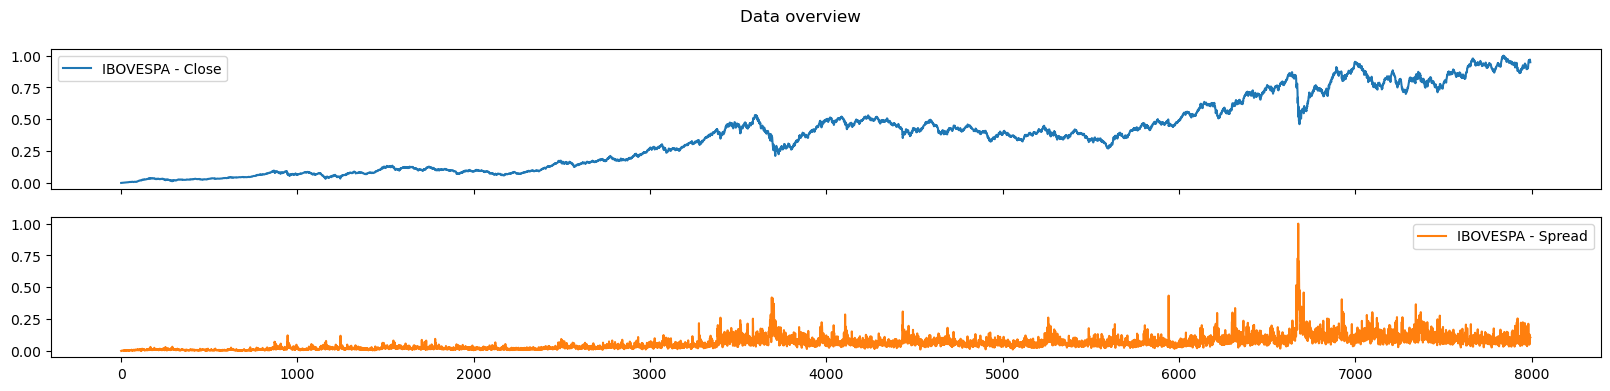

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

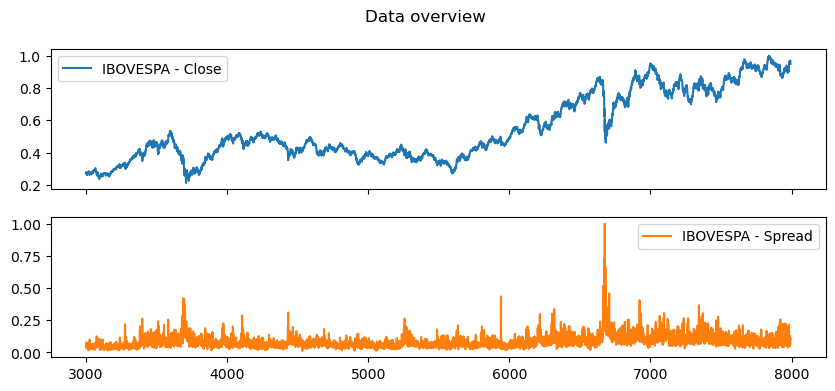

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

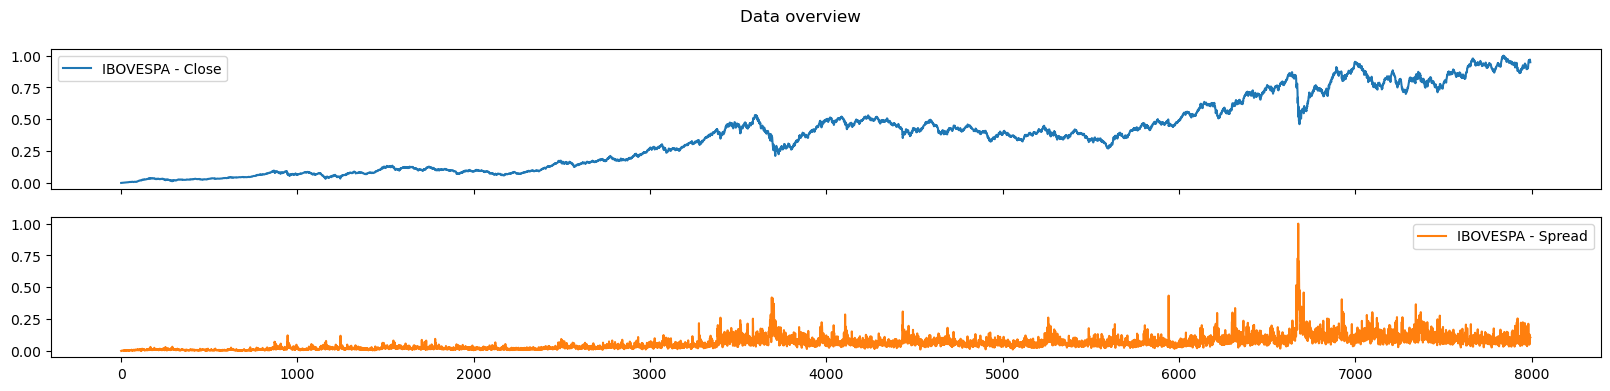

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

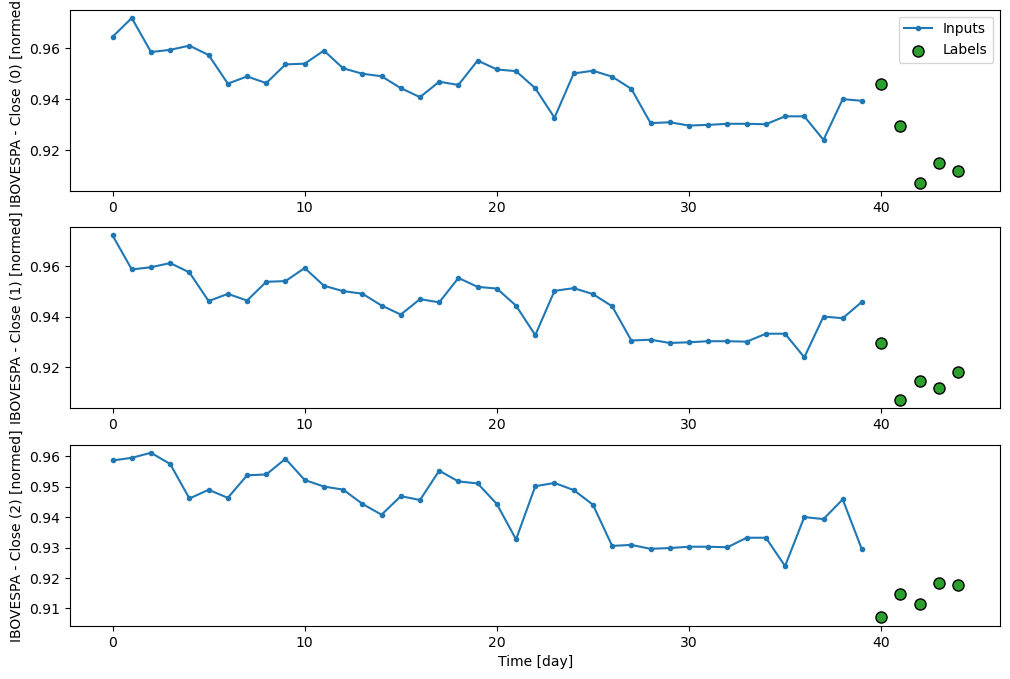

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:02 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 61.4448 - mean_squared_error: 5.8354e-05 - root_mean_squared_error: 0.0076 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 51.5029 - mean_squared_error: 6.9611e-05 - root_mean_squared_error: 0.0082

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 49.1560 - mean_squared_error: 9.3911e-05 - root_mean_squared_error: 0.0094

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 46.6319 - mean_squared_error: 1.0184e-04 - root_mean_squared_error: 0.0099

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 44.3326 - mean_squared_error: 1.0456e-04 - root_mean_squared_error: 0.0100

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.6686 - mean_squared_error: 1.0466e-04 - root_mean_squared_error: 0.0101

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 40.8586 - mean_squared_error: 1.1034e-04 - root_mean_squared_error: 0.0103

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.3540 - mean_squared_error: 1.1719e-04 - root_mean_squared_error: 0.0107

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.0649 - mean_squared_error: 1.2311e-04 - root_mean_squared_error: 0.0109

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.2701 - mean_squared_error: 1.2777e-04 - root_mean_squared_error: 0.0111

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.4676 - mean_squared_error: 1.3940e-04 - root_mean_squared_error: 0.0116

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 35.7402 - mean_squared_error: 1.5043e-04 - root_mean_squared_error: 0.0120

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.1276 - mean_squared_error: 1.6671e-04 - root_mean_squared_error: 0.0125

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 34.5240 - mean_squared_error: 1.8081e-04 - root_mean_squared_error: 0.0130

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 33.9458 - mean_squared_error: 1.9287e-04 - root_mean_squared_error: 0.0134

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 33.4118 - mean_squared_error: 2.0347e-04 - root_mean_squared_error: 0.0137

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 33.0089 - mean_squared_error: 2.0983e-04 - root_mean_squared_error: 0.0140

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 32.5033 - mean_squared_error: 2.1710e-04 - root_mean_squared_error: 0.0142

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 32.0758 - mean_squared_error: 2.2509e-04 - root_mean_squared_error: 0.0145

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 31.7173 - mean_squared_error: 2.3687e-04 - root_mean_squared_error: 0.0148

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 31.3815 - mean_squared_error: 2.4944e-04 - root_mean_squared_error: 0.0152

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 31.0436 - mean_squared_error: 2.6053e-04 - root_mean_squared_error: 0.0155

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 30.7020 - mean_squared_error: 2.7026e-04 - root_mean_squared_error: 0.0158

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 30.3631 - mean_squared_error: 2.7941e-04 - root_mean_squared_error: 0.0161

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 30.0365 - mean_squared_error: 2.8993e-04 - root_mean_squared_error: 0.0164

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 29.7231 - mean_squared_error: 3.0206e-04 - root_mean_squared_error: 0.0167

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 29.4280 - mean_squared_error: 3.1925e-04 - root_mean_squared_error: 0.0171

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 29.1354 - mean_squared_error: 3.3639e-04 - root_mean_squared_error: 0.0175

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 28.8490 - mean_squared_error: 3.5504e-04 - root_mean_squared_error: 0.0179

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 28.5982 - mean_squared_error: 3.8613e-04 - root_mean_squared_error: 0.0185

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 28.3634 - mean_squared_error: 4.2017e-04 - root_mean_squared_error: 0.0191

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 28.2029 - mean_squared_error: 4.5704e-04 - root_mean_squared_error: 0.0197

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 28.0095 - mean_squared_error: 5.2392e-04 - root_mean_squared_error: 0.0207

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 27.8700 - mean_squared_error: 5.7530e-04 - root_mean_squared_error: 0.0214

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 27.6889 - mean_squared_error: 6.4382e-04 - root_mean_squared_error: 0.0224

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 27.5154 - mean_squared_error: 7.1203e-04 - root_mean_squared_error: 0.0233

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 27.3860 - mean_squared_error: 7.6081e-04 - root_mean_squared_error: 0.0240

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 27.2139 - mean_squared_error: 8.2267e-04 - root_mean_squared_error: 0.0248

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 27.0388 - mean_squared_error: 8.7942e-04 - root_mean_squared_error: 0.0256

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 26.8684 - mean_squared_error: 9.3360e-04 - root_mean_squared_error: 0.0264

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 26.6997 - mean_squared_error: 9.8434e-04 - root_mean_squared_error: 0.0271

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 26.5336 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0277    

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 26.4128 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 26.2532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 26.0966 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 25.9825 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 25.8318 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 25.6864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 25.5448 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 25.4058 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 25.2703 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 25.1359 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 25.0025 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 24.8720 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 24.7806 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 24.6610 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 24.5433 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 24.4263 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 24.3389 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 24.2517 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 24.1354 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 24.0202 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377 - val_loss: 0.0601 - val_mean_absolute_error: 0.0601 - val_mean_absolute_percentage_error: 6.3601 - val_mean_squared_error: 0.0043 - val_root_mean_squared_error: 0.0652 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.6426 - mean_absolute_error: 0.6426 - mean_absolute_percentage_error: 8633.2559 - mean_squared_error: 0.4129 - root_mean_squared_error: 0.6426

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6394 - mean_absolute_error: 0.6394 - mean_absolute_percentage_error: 6140.3525 - mean_squared_error: 0.4090 - root_mean_squared_error: 0.6395

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6216 - mean_absolute_error: 0.6216 - mean_absolute_percentage_error: 4969.3101 - mean_squared_error: 0.3882 - root_mean_squared_error: 0.6227

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 4320.7515 - mean_squared_error: 0.3609 - root_mean_squared_error: 0.5994

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5580 - mean_absolute_error: 0.5580 - mean_absolute_percentage_error: 3843.6829 - mean_squared_error: 0.3317 - root_mean_squared_error: 0.5728

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 3488.5598 - mean_squared_error: 0.3124 - root_mean_squared_error: 0.5551

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5087 - mean_absolute_error: 0.5087 - mean_absolute_percentage_error: 3208.0562 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5407

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4860 - mean_absolute_error: 0.4860 - mean_absolute_percentage_error: 2971.8813 - mean_squared_error: 0.2817 - root_mean_squared_error: 0.5255

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4643 - mean_absolute_error: 0.4643 - mean_absolute_percentage_error: 2771.0835 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.5107

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4442 - mean_absolute_error: 0.4442 - mean_absolute_percentage_error: 2598.4983 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4967

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4259 - mean_absolute_error: 0.4259 - mean_absolute_percentage_error: 2449.2744 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4835

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 2318.4114 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 2202.4153 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4597

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 2098.7888 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4489

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 2005.5991 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4389

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1941.6720 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4318

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1863.2860 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4228

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 1791.7292 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4143

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1742.0005 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4083

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1680.3396 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.4007

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1623.4088 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3936

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1583.4941 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3884

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1533.5955 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3819

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1487.1179 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3757

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1443.7062 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3698

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1403.0609 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3642

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1374.2316 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3601

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1346.7067 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3562

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1320.4009 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3524

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1295.2301 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3488

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1263.3040 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3441

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1233.1494 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3397

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1204.6064 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3355

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1177.5165 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3314

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1151.7686 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3275

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1127.2572 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3238

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1103.8934 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3202

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1081.6029 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3167

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1065.5375 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3142

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1044.9327 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3109

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1025.2047 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3077

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1010.9485 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3054

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 992.6177 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.3024 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 975.0179 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2995

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 958.1041 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2967

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 941.8347 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2940

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 926.1754 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2913

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 911.0905 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2887

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 896.5504 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2862

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 882.5223 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2838

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 868.9766 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2814

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 855.8895 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2791

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 843.2369 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2768

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 830.9958 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2747

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 822.0726 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2730

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 810.5079 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2710

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 799.3055 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2690

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 788.4440 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2670

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 780.5120 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2656

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1698 - mean_absolute_error: 0.1698 - mean_absolute_percentage_error: 770.2092 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2637

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 762.6791 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2623

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 752.8911 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2605

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 743.3818 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2587

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 741.0513 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2583 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385 - val_mean_absolute_percentage_error: 4.0682 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0434 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 4877.9585 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3631

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3590 - mean_absolute_error: 0.3590 - mean_absolute_percentage_error: 3453.7322 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3590 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3508 - mean_absolute_error: 0.3508 - mean_absolute_percentage_error: 2801.6338 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3511

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3418 - mean_absolute_error: 0.3418 - mean_absolute_percentage_error: 2525.8933 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3428

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 2249.5354 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3292

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 2029.4431 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.3148

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1852.5743 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.3015

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1706.4796 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2895

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1584.1493 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2786

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1480.0275 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2689

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1390.3820 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2601

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1312.2648 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2521

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 1243.4474 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2448

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1182.3038 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2382

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 1127.5769 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2320

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 1078.2777 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2263

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 1033.6123 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2211

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 992.9351 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2162 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 955.7141 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2116

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 921.5056 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2073

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 889.9463 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2033

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 867.8286 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2004

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 840.1931 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1968

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 814.4686 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1934

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 790.4553 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1901

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 767.9828 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1871

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 746.9016 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1841

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 727.0804 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1813

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 708.4061 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1787

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 690.7794 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1761

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 678.1961 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1743

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 662.2010 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1720

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 647.0359 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1697

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 636.1649 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1681

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 622.2943 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1660

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 609.0853 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1640

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 596.4896 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1621

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 584.4640 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1602

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 572.9695 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1585

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 561.9696 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1567

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 551.4319 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1551

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 541.3268 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1534

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 531.6279 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1519

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 522.3109 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1504

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 513.3517 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1489

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 504.7302 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1475

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 496.4272 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1461

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 488.4241 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1447

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 480.7045 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1434

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 473.2532 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1422

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 467.8323 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1413

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 460.8165 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1401

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 455.7067 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1392

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 449.0867 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1380

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 444.2621 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1372

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 438.0074 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1361

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 431.9475 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1351

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 426.0729 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1341

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 420.3753 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1331

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 414.8458 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1321

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 409.4774 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1312

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 404.2661 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1303 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329 - val_mean_absolute_percentage_error: 3.5561 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0361 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1791.6162 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1335

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 1253.5083 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1288

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 981.3333 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1194 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 821.5371 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1103

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 740.6908 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1050

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 658.0903 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0990

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 595.0850 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0939

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 544.4807 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0896

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 502.8767 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0859

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 468.0547 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0826

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 438.4898 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0797

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 412.9559 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0771

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 390.5901 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0748

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 370.8203 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0727

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 353.1985 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0707

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 337.3864 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0689

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 323.1300 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0673

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 310.2135 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0657

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 298.4477 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0643

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 287.6623 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0630

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 277.7281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 268.5446 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 260.0248 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 252.0978 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0585

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 244.7021 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 237.7854 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 231.2983 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0557

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 226.6904 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 220.8610 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 215.3619 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 210.1668 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 205.2477 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 200.5811 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 196.1475 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 191.9288 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 187.9093 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 184.0751 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 180.4132 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 176.9114 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 173.5592 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 170.3469 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 168.0238 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 165.0353 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 162.1641 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 159.4032 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 156.7464 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 154.1872 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 151.7201 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 149.3400 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 147.0422 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 144.8227 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 142.6775 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 140.6025 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 139.0907 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 137.1320 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 135.2352 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 133.3973 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 131.6161 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0412

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 129.8881 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 128.2110 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 126.5824 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 126.1834 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405 - val_loss: 0.0432 - val_mean_absolute_error: 0.0432 - val_mean_absolute_percentage_error: 4.5993 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0454 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 103.1845 - mean_squared_error: 6.8001e-05 - root_mean_squared_error: 0.0082

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 59.0251 - mean_squared_error: 4.3939e-05 - root_mean_squared_error: 0.0066  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.6174 - mean_squared_error: 3.7607e-05 - root_mean_squared_error: 0.0061

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.7548 - mean_squared_error: 3.3521e-05 - root_mean_squared_error: 0.0057

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 34.4095 - mean_squared_error: 3.0859e-05 - root_mean_squared_error: 0.0055

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.2550 - mean_squared_error: 2.8891e-05 - root_mean_squared_error: 0.0053

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.7743 - mean_squared_error: 2.7315e-05 - root_mean_squared_error: 0.0052

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 26.7678 - mean_squared_error: 2.6365e-05 - root_mean_squared_error: 0.0051

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 25.1170 - mean_squared_error: 2.5821e-05 - root_mean_squared_error: 0.0050

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 23.7417 - mean_squared_error: 2.5435e-05 - root_mean_squared_error: 0.0050

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 22.5921 - mean_squared_error: 2.5237e-05 - root_mean_squared_error: 0.0050

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.5876 - mean_squared_error: 2.5055e-05 - root_mean_squared_error: 0.0050

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.7062 - mean_squared_error: 2.5123e-05 - root_mean_squared_error: 0.0050

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.9190 - mean_squared_error: 2.5237e-05 - root_mean_squared_error: 0.0050

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.2101 - mean_squared_error: 2.5342e-05 - root_mean_squared_error: 0.0050

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.5700 - mean_squared_error: 2.5419e-05 - root_mean_squared_error: 0.0050

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.1279 - mean_squared_error: 2.5454e-05 - root_mean_squared_error: 0.0050

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.5840 - mean_squared_error: 2.5461e-05 - root_mean_squared_error: 0.0050

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.0841 - mean_squared_error: 2.5424e-05 - root_mean_squared_error: 0.0050

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.6200 - mean_squared_error: 2.5351e-05 - root_mean_squared_error: 0.0050

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.1891 - mean_squared_error: 2.5333e-05 - root_mean_squared_error: 0.0050

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.7871 - mean_squared_error: 2.5329e-05 - root_mean_squared_error: 0.0050

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.4105 - mean_squared_error: 2.5342e-05 - root_mean_squared_error: 0.0050

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.0576 - mean_squared_error: 2.5391e-05 - root_mean_squared_error: 0.0050

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 14.7254 - mean_squared_error: 2.5497e-05 - root_mean_squared_error: 0.0050

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 14.4124 - mean_squared_error: 2.5684e-05 - root_mean_squared_error: 0.0050

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.1164 - mean_squared_error: 2.5917e-05 - root_mean_squared_error: 0.0051

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 13.8360 - mean_squared_error: 2.6274e-05 - root_mean_squared_error: 0.0051

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 13.5705 - mean_squared_error: 2.6846e-05 - root_mean_squared_error: 0.0052

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 13.3215 - mean_squared_error: 2.7950e-05 - root_mean_squared_error: 0.0052

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.0885 - mean_squared_error: 2.9473e-05 - root_mean_squared_error: 0.0053

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 12.8702 - mean_squared_error: 3.1564e-05 - root_mean_squared_error: 0.0055

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 12.6632 - mean_squared_error: 3.3931e-05 - root_mean_squared_error: 0.0056

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.4676 - mean_squared_error: 3.6730e-05 - root_mean_squared_error: 0.0058

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.2801 - mean_squared_error: 3.9427e-05 - root_mean_squared_error: 0.0060

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.1003 - mean_squared_error: 4.2027e-05 - root_mean_squared_error: 0.0061

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.9278 - mean_squared_error: 4.4513e-05 - root_mean_squared_error: 0.0063

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.7619 - mean_squared_error: 4.6877e-05 - root_mean_squared_error: 0.0064

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.6017 - mean_squared_error: 4.9074e-05 - root_mean_squared_error: 0.0065

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.4476 - mean_squared_error: 5.1155e-05 - root_mean_squared_error: 0.0067

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.2988 - mean_squared_error: 5.3095e-05 - root_mean_squared_error: 0.0068

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.1550 - mean_squared_error: 5.4918e-05 - root_mean_squared_error: 0.0069

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.0171 - mean_squared_error: 5.6731e-05 - root_mean_squared_error: 0.0070

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.8838 - mean_squared_error: 5.8445e-05 - root_mean_squared_error: 0.0071

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 10.7552 - mean_squared_error: 6.0093e-05 - root_mean_squared_error: 0.0072

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 10.6314 - mean_squared_error: 6.1724e-05 - root_mean_squared_error: 0.0073

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 10.5116 - mean_squared_error: 6.3300e-05 - root_mean_squared_error: 0.0074

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 10.3958 - mean_squared_error: 6.4871e-05 - root_mean_squared_error: 0.0075

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 10.2842 - mean_squared_error: 6.6547e-05 - root_mean_squared_error: 0.0076

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 10.1768 - mean_squared_error: 6.8445e-05 - root_mean_squared_error: 0.0077

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 10.0731 - mean_squared_error: 7.0471e-05 - root_mean_squared_error: 0.0078

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 9.9726 - mean_squared_error: 7.2537e-05 - root_mean_squared_error: 0.0079 

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 9.8749 - mean_squared_error: 7.4671e-05 - root_mean_squared_error: 0.0080

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 9.7811 - mean_squared_error: 7.7452e-05 - root_mean_squared_error: 0.0081

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 9.6907 - mean_squared_error: 8.0636e-05 - root_mean_squared_error: 0.0083

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 9.6032 - mean_squared_error: 8.4237e-05 - root_mean_squared_error: 0.0084

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 9.5196 - mean_squared_error: 8.8859e-05 - root_mean_squared_error: 0.0086

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 9.4385 - mean_squared_error: 9.3611e-05 - root_mean_squared_error: 0.0088

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 9.3602 - mean_squared_error: 9.8766e-05 - root_mean_squared_error: 0.0090

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 9.2840 - mean_squared_error: 1.0384e-04 - root_mean_squared_error: 0.0092

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 9.2466 - mean_squared_error: 1.0630e-04 - root_mean_squared_error: 0.0093 - val_loss: 0.0397 - val_mean_absolute_error: 0.0397 - val_mean_absolute_percentage_error: 4.2125 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0423 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1099.5100 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0822

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 746.2659 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0748 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 569.0173 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 477.8503 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 416.3499 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 371.6452 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 337.0544 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0511

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 309.1818 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 286.1877 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 266.8623 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 250.3750 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 236.0822 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 223.5566 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 212.4720 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 202.5828 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 193.6990 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 185.6697 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 178.3720 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 171.7015 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 165.5746 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 159.9275 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 154.7023 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.8521 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 145.3366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 141.1213 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 137.1767 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 133.4764 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 132.5868 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.7105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 129.1598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 127.5214 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 125.1526 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 123.6304 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 122.1502 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.7117 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 118.6288 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 117.9535 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 115.9799 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.0814 - mean_squared_error: 9.8933e-04 - root_mean_squared_error: 0.0286

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 112.2538 - mean_squared_error: 9.7776e-04 - root_mean_squared_error: 0.0285

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 110.4917 - mean_squared_error: 9.6657e-04 - root_mean_squared_error: 0.0283

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 108.7919 - mean_squared_error: 9.5577e-04 - root_mean_squared_error: 0.0282

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 107.1519 - mean_squared_error: 9.4552e-04 - root_mean_squared_error: 0.0280

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 105.5678 - mean_squared_error: 9.3566e-04 - root_mean_squared_error: 0.0279

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 104.0363 - mean_squared_error: 9.2607e-04 - root_mean_squared_error: 0.0278

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 102.5545 - mean_squared_error: 9.1673e-04 - root_mean_squared_error: 0.0276

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 101.1201 - mean_squared_error: 9.0763e-04 - root_mean_squared_error: 0.0275

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 99.7309 - mean_squared_error: 8.9879e-04 - root_mean_squared_error: 0.0274 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 98.3844 - mean_squared_error: 8.9015e-04 - root_mean_squared_error: 0.0273

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 97.0787 - mean_squared_error: 8.8173e-04 - root_mean_squared_error: 0.0271

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.8128 - mean_squared_error: 8.7363e-04 - root_mean_squared_error: 0.0270

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.5845 - mean_squared_error: 8.6577e-04 - root_mean_squared_error: 0.0269

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.3917 - mean_squared_error: 8.5810e-04 - root_mean_squared_error: 0.0268

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 92.2332 - mean_squared_error: 8.5067e-04 - root_mean_squared_error: 0.0267

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.7414 - mean_squared_error: 8.4153e-04 - root_mean_squared_error: 0.0266

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.6597 - mean_squared_error: 8.3518e-04 - root_mean_squared_error: 0.0265

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.9549 - mean_squared_error: 8.3105e-04 - root_mean_squared_error: 0.0264

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 87.9215 - mean_squared_error: 8.2505e-04 - root_mean_squared_error: 0.0264

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 86.5858 - mean_squared_error: 8.1730e-04 - root_mean_squared_error: 0.0262

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 85.6142 - mean_squared_error: 8.1171e-04 - root_mean_squared_error: 0.0262

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.9802 - mean_squared_error: 8.0806e-04 - root_mean_squared_error: 0.0261

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 84.0493 - mean_squared_error: 8.0279e-04 - root_mean_squared_error: 0.0261

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 82.8437 - mean_squared_error: 7.9597e-04 - root_mean_squared_error: 0.0260

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 81.6770 - mean_squared_error: 7.8953e-04 - root_mean_squared_error: 0.0259

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 80.8277 - mean_squared_error: 7.8564e-04 - root_mean_squared_error: 0.0258

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 79.9986 - mean_squared_error: 7.8197e-04 - root_mean_squared_error: 0.0258

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 79.1897 - mean_squared_error: 7.7925e-04 - root_mean_squared_error: 0.0258

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 78.3999 - mean_squared_error: 7.7707e-04 - root_mean_squared_error: 0.0258

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 77.6289 - mean_squared_error: 7.7561e-04 - root_mean_squared_error: 0.0258

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 76.8760 - mean_squared_error: 7.7482e-04 - root_mean_squared_error: 0.0258

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 76.1400 - mean_squared_error: 7.7425e-04 - root_mean_squared_error: 0.0258

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 75.4208 - mean_squared_error: 7.7429e-04 - root_mean_squared_error: 0.0258

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 74.4863 - mean_squared_error: 7.7459e-04 - root_mean_squared_error: 0.0259

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 74.0298 - mean_squared_error: 7.7474e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232 - val_mean_absolute_percentage_error: 2.5098 - val_mean_squared_error: 7.0257e-04 - val_root_mean_squared_error: 0.0265 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 2075.9209 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1546

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 1726.8115 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1532 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1363.9841 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1491

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1161.3271 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1427

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1018.4763 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1352

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 912.3245 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1284 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 830.1368 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1225

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 763.4000 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1173

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 708.5317 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1128

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 676.7685 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1101

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 648.0880 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1076

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 622.1876 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1052

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 587.6230 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1021

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 566.9233 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1001

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 547.8759 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0982

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 530.2613 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0965

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 498.6396 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0933

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 471.0594 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0904

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 446.7626 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0877

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 425.1697 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0854

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 405.8248 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0832

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 388.3851 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0811

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 372.5692 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0792

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 358.1627 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0775

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 344.9702 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0759

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 332.8362 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0743

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 321.6344 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 316.3472 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0722

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 311.2534 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0716

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 303.9522 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 297.0285 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 290.4531 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 284.2000 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0680

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 278.2436 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 272.5627 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0664

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 267.1381 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 263.6554 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 258.6192 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0644

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 255.3814 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 253.7970 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 250.6942 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0633

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 246.1973 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 241.8784 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 239.0926 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0617

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 235.0467 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 232.4339 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 229.8854 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 227.3989 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 222.6030 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 219.1527 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 216.9185 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 214.7349 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 212.6002 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 209.4860 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0573

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 206.4725 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 205.4896 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 203.5548 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0564

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 200.7281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0560

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 197.9879 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0555

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 195.3307 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 193.6032 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 191.0754 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 188.6206 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 186.2358 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 183.9178 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 181.6634 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0529

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 179.4702 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 177.3354 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 175.2566 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 172.5684 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0515

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 169.9712 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 167.4601 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0506

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 165.0308 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 162.6801 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 160.4037 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 158.1979 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 156.0594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0488

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 154.4977 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 152.4693 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 150.4999 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0479

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 149.0616 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.7641 - val_mean_squared_error: 4.2507e-04 - val_root_mean_squared_error: 0.0206 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 75.0328 - mean_squared_error: 3.3877e-05 - root_mean_squared_error: 0.0058

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 45.0689 - mean_squared_error: 2.2542e-05 - root_mean_squared_error: 0.0047 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.0099 - mean_squared_error: 2.0224e-05 - root_mean_squared_error: 0.0045

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.9198 - mean_squared_error: 1.8753e-05 - root_mean_squared_error: 0.0043

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 26.5285 - mean_squared_error: 1.7438e-05 - root_mean_squared_error: 0.0041

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.0537 - mean_squared_error: 1.6415e-05 - root_mean_squared_error: 0.0040

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.1223 - mean_squared_error: 1.5650e-05 - root_mean_squared_error: 0.0039

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.6049 - mean_squared_error: 1.5644e-05 - root_mean_squared_error: 0.0039

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.4146 - mean_squared_error: 1.6312e-05 - root_mean_squared_error: 0.0040

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.4793 - mean_squared_error: 1.7360e-05 - root_mean_squared_error: 0.0041

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 17.7659 - mean_squared_error: 1.9046e-05 - root_mean_squared_error: 0.0043

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.1856 - mean_squared_error: 2.1084e-05 - root_mean_squared_error: 0.0045

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.6679 - mean_squared_error: 2.2987e-05 - root_mean_squared_error: 0.0047

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.3050 - mean_squared_error: 2.4194e-05 - root_mean_squared_error: 0.0048

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 15.8554 - mean_squared_error: 2.5593e-05 - root_mean_squared_error: 0.0049

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 15.6441 - mean_squared_error: 2.6202e-05 - root_mean_squared_error: 0.0050

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 15.3487 - mean_squared_error: 2.7065e-05 - root_mean_squared_error: 0.0050

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 14.9901 - mean_squared_error: 2.8158e-05 - root_mean_squared_error: 0.0051

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 14.6806 - mean_squared_error: 2.9297e-05 - root_mean_squared_error: 0.0053

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.4743 - mean_squared_error: 3.0164e-05 - root_mean_squared_error: 0.0053

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.2138 - mean_squared_error: 3.1198e-05 - root_mean_squared_error: 0.0054

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.9658 - mean_squared_error: 3.2168e-05 - root_mean_squared_error: 0.0055

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.7281 - mean_squared_error: 3.3034e-05 - root_mean_squared_error: 0.0056

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.4993 - mean_squared_error: 3.3809e-05 - root_mean_squared_error: 0.0056

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.3340 - mean_squared_error: 3.4369e-05 - root_mean_squared_error: 0.0057

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.1743 - mean_squared_error: 3.4956e-05 - root_mean_squared_error: 0.0057

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.0200 - mean_squared_error: 3.5607e-05 - root_mean_squared_error: 0.0058

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.8233 - mean_squared_error: 3.6609e-05 - root_mean_squared_error: 0.0059

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.6341 - mean_squared_error: 3.7673e-05 - root_mean_squared_error: 0.0060

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.4970 - mean_squared_error: 3.8578e-05 - root_mean_squared_error: 0.0060

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.3641 - mean_squared_error: 3.9647e-05 - root_mean_squared_error: 0.0061

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.1932 - mean_squared_error: 4.1261e-05 - root_mean_squared_error: 0.0062

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.0313 - mean_squared_error: 4.3147e-05 - root_mean_squared_error: 0.0063

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.8753 - mean_squared_error: 4.4990e-05 - root_mean_squared_error: 0.0065

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.7239 - mean_squared_error: 4.6763e-05 - root_mean_squared_error: 0.0066

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.5771 - mean_squared_error: 4.8482e-05 - root_mean_squared_error: 0.0067

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.4343 - mean_squared_error: 5.0102e-05 - root_mean_squared_error: 0.0068

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.2956 - mean_squared_error: 5.1648e-05 - root_mean_squared_error: 0.0069

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.1614 - mean_squared_error: 5.3151e-05 - root_mean_squared_error: 0.0070

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.0313 - mean_squared_error: 5.4604e-05 - root_mean_squared_error: 0.0071

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 10.9051 - mean_squared_error: 5.5995e-05 - root_mean_squared_error: 0.0072

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 10.8128 - mean_squared_error: 5.6992e-05 - root_mean_squared_error: 0.0072

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 10.6929 - mean_squared_error: 5.8253e-05 - root_mean_squared_error: 0.0073

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 10.5762 - mean_squared_error: 5.9425e-05 - root_mean_squared_error: 0.0074

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 10.4631 - mean_squared_error: 6.0566e-05 - root_mean_squared_error: 0.0074

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 10.3533 - mean_squared_error: 6.1661e-05 - root_mean_squared_error: 0.0075

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 10.2468 - mean_squared_error: 6.2704e-05 - root_mean_squared_error: 0.0076

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 10.1435 - mean_squared_error: 6.3726e-05 - root_mean_squared_error: 0.0076

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 10.0430 - mean_squared_error: 6.4708e-05 - root_mean_squared_error: 0.0077

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 9.9450 - mean_squared_error: 6.5656e-05 - root_mean_squared_error: 0.0078 

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 9.8494 - mean_squared_error: 6.6565e-05 - root_mean_squared_error: 0.0078

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 9.7562 - mean_squared_error: 6.7456e-05 - root_mean_squared_error: 0.0079

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 9.6878 - mean_squared_error: 6.8133e-05 - root_mean_squared_error: 0.0079

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 9.5988 - mean_squared_error: 6.9080e-05 - root_mean_squared_error: 0.0080

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 9.5119 - mean_squared_error: 7.0047e-05 - root_mean_squared_error: 0.0080

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 9.4276 - mean_squared_error: 7.1289e-05 - root_mean_squared_error: 0.0081

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 9.3460 - mean_squared_error: 7.2892e-05 - root_mean_squared_error: 0.0082

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 9.2670 - mean_squared_error: 7.4768e-05 - root_mean_squared_error: 0.0083

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 9.1900 - mean_squared_error: 7.6778e-05 - root_mean_squared_error: 0.0084

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 9.1151 - mean_squared_error: 7.8931e-05 - root_mean_squared_error: 0.0085

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 9.0421 - mean_squared_error: 8.1166e-05 - root_mean_squared_error: 0.0086

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 8.9710 - mean_squared_error: 8.3490e-05 - root_mean_squared_error: 0.0087

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 8.9018 - mean_squared_error: 8.5952e-05 - root_mean_squared_error: 0.0088

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 8.8849 - mean_squared_error: 8.6568e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6141 - val_mean_squared_error: 3.5348e-04 - val_root_mean_squared_error: 0.0188 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 93.3345 - mean_squared_error: 5.8156e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.6488 - mean_squared_error: 4.1342e-05 - root_mean_squared_error: 0.0064 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.7825 - mean_squared_error: 4.0204e-05 - root_mean_squared_error: 0.0063

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.5085 - mean_squared_error: 3.9898e-05 - root_mean_squared_error: 0.0063

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.8501 - mean_squared_error: 3.8747e-05 - root_mean_squared_error: 0.0062

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.5586 - mean_squared_error: 3.7469e-05 - root_mean_squared_error: 0.0061

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.9668 - mean_squared_error: 3.6207e-05 - root_mean_squared_error: 0.0060

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 29.8792 - mean_squared_error: 3.5591e-05 - root_mean_squared_error: 0.0059

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 28.1915 - mean_squared_error: 3.6081e-05 - root_mean_squared_error: 0.0060

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.8081 - mean_squared_error: 3.7112e-05 - root_mean_squared_error: 0.0061

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.7240 - mean_squared_error: 3.8795e-05 - root_mean_squared_error: 0.0062

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.8156 - mean_squared_error: 4.0748e-05 - root_mean_squared_error: 0.0063

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.9959 - mean_squared_error: 4.2411e-05 - root_mean_squared_error: 0.0065

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 23.2475 - mean_squared_error: 4.3935e-05 - root_mean_squared_error: 0.0066

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 22.5576 - mean_squared_error: 4.5183e-05 - root_mean_squared_error: 0.0067

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 21.9256 - mean_squared_error: 4.6246e-05 - root_mean_squared_error: 0.0067

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 21.3512 - mean_squared_error: 4.7189e-05 - root_mean_squared_error: 0.0068

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.8302 - mean_squared_error: 4.8039e-05 - root_mean_squared_error: 0.0069

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 20.3611 - mean_squared_error: 4.8851e-05 - root_mean_squared_error: 0.0069

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.9279 - mean_squared_error: 4.9570e-05 - root_mean_squared_error: 0.0070

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 19.5180 - mean_squared_error: 5.0220e-05 - root_mean_squared_error: 0.0070

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 19.1318 - mean_squared_error: 5.0874e-05 - root_mean_squared_error: 0.0071

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.7641 - mean_squared_error: 5.1469e-05 - root_mean_squared_error: 0.0071

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.4147 - mean_squared_error: 5.2057e-05 - root_mean_squared_error: 0.0072

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.0820 - mean_squared_error: 5.2700e-05 - root_mean_squared_error: 0.0072

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.8437 - mean_squared_error: 5.3304e-05 - root_mean_squared_error: 0.0072

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.5391 - mean_squared_error: 5.4207e-05 - root_mean_squared_error: 0.0073

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.2478 - mean_squared_error: 5.5237e-05 - root_mean_squared_error: 0.0074

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.9687 - mean_squared_error: 5.6478e-05 - root_mean_squared_error: 0.0074

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.7015 - mean_squared_error: 5.7965e-05 - root_mean_squared_error: 0.0075

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.5103 - mean_squared_error: 5.9374e-05 - root_mean_squared_error: 0.0076

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 16.2653 - mean_squared_error: 6.1299e-05 - root_mean_squared_error: 0.0077

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 16.1468 - mean_squared_error: 6.2311e-05 - root_mean_squared_error: 0.0078

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 16.0304 - mean_squared_error: 6.3315e-05 - root_mean_squared_error: 0.0078

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 15.8600 - mean_squared_error: 6.4850e-05 - root_mean_squared_error: 0.0079

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 15.6944 - mean_squared_error: 6.6404e-05 - root_mean_squared_error: 0.0080

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 15.4800 - mean_squared_error: 6.8418e-05 - root_mean_squared_error: 0.0081

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 15.2729 - mean_squared_error: 7.0361e-05 - root_mean_squared_error: 0.0082

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 15.0732 - mean_squared_error: 7.2270e-05 - root_mean_squared_error: 0.0083

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 14.8802 - mean_squared_error: 7.4118e-05 - root_mean_squared_error: 0.0084

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 14.6932 - mean_squared_error: 7.5853e-05 - root_mean_squared_error: 0.0085

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 14.5567 - mean_squared_error: 7.7077e-05 - root_mean_squared_error: 0.0086

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 14.3795 - mean_squared_error: 7.8606e-05 - root_mean_squared_error: 0.0086

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 14.2075 - mean_squared_error: 8.0019e-05 - root_mean_squared_error: 0.0087

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 14.0410 - mean_squared_error: 8.1381e-05 - root_mean_squared_error: 0.0088

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 13.8795 - mean_squared_error: 8.2671e-05 - root_mean_squared_error: 0.0088

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 13.7228 - mean_squared_error: 8.3880e-05 - root_mean_squared_error: 0.0089

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 13.6085 - mean_squared_error: 8.4758e-05 - root_mean_squared_error: 0.0090

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 13.4966 - mean_squared_error: 8.5598e-05 - root_mean_squared_error: 0.0090

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 13.3510 - mean_squared_error: 8.6666e-05 - root_mean_squared_error: 0.0091

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 13.2092 - mean_squared_error: 8.7685e-05 - root_mean_squared_error: 0.0091

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 13.0710 - mean_squared_error: 8.8647e-05 - root_mean_squared_error: 0.0092

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 12.9365 - mean_squared_error: 8.9593e-05 - root_mean_squared_error: 0.0092

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 12.8055 - mean_squared_error: 9.0539e-05 - root_mean_squared_error: 0.0093

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 12.6778 - mean_squared_error: 9.1482e-05 - root_mean_squared_error: 0.0093

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 12.5534 - mean_squared_error: 9.2524e-05 - root_mean_squared_error: 0.0094

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 12.4329 - mean_squared_error: 9.3975e-05 - root_mean_squared_error: 0.0094

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 12.3158 - mean_squared_error: 9.5570e-05 - root_mean_squared_error: 0.0095

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 12.2016 - mean_squared_error: 9.7257e-05 - root_mean_squared_error: 0.0096

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 12.0904 - mean_squared_error: 9.9001e-05 - root_mean_squared_error: 0.0097

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 11.9819 - mean_squared_error: 1.0078e-04 - root_mean_squared_error: 0.0097

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 11.8759 - mean_squared_error: 1.0257e-04 - root_mean_squared_error: 0.0098

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 11.7981 - mean_squared_error: 1.0391e-04 - root_mean_squared_error: 0.0099

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 11.7218 - mean_squared_error: 1.0523e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0788 - val_mean_squared_error: 1.6041e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 90.0385 - mean_squared_error: 6.1431e-05 - root_mean_squared_error: 0.0078

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.8524 - mean_squared_error: 4.0820e-05 - root_mean_squared_error: 0.0063

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.3034 - mean_squared_error: 3.4965e-05 - root_mean_squared_error: 0.0058

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.8595 - mean_squared_error: 3.1405e-05 - root_mean_squared_error: 0.0055

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.6559 - mean_squared_error: 2.8785e-05 - root_mean_squared_error: 0.0053

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.5223 - mean_squared_error: 2.6620e-05 - root_mean_squared_error: 0.0051

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.0492 - mean_squared_error: 2.4825e-05 - root_mean_squared_error: 0.0049

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.0739 - mean_squared_error: 2.3786e-05 - root_mean_squared_error: 0.0048

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 23.4782 - mean_squared_error: 2.3271e-05 - root_mean_squared_error: 0.0047

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.1734 - mean_squared_error: 2.3013e-05 - root_mean_squared_error: 0.0047

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 21.1115 - mean_squared_error: 2.3092e-05 - root_mean_squared_error: 0.0047

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.1959 - mean_squared_error: 2.3241e-05 - root_mean_squared_error: 0.0048

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.3927 - mean_squared_error: 2.3551e-05 - root_mean_squared_error: 0.0048

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.6712 - mean_squared_error: 2.3830e-05 - root_mean_squared_error: 0.0048

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.1762 - mean_squared_error: 2.4000e-05 - root_mean_squared_error: 0.0049

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 17.5690 - mean_squared_error: 2.4158e-05 - root_mean_squared_error: 0.0049

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 17.0167 - mean_squared_error: 2.4267e-05 - root_mean_squared_error: 0.0049

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 16.5120 - mean_squared_error: 2.4319e-05 - root_mean_squared_error: 0.0049

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 16.0482 - mean_squared_error: 2.4322e-05 - root_mean_squared_error: 0.0049

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 15.6169 - mean_squared_error: 2.4283e-05 - root_mean_squared_error: 0.0049

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 15.2162 - mean_squared_error: 2.4283e-05 - root_mean_squared_error: 0.0049

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.8428 - mean_squared_error: 2.4297e-05 - root_mean_squared_error: 0.0049

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.4930 - mean_squared_error: 2.4324e-05 - root_mean_squared_error: 0.0049

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.1651 - mean_squared_error: 2.4387e-05 - root_mean_squared_error: 0.0049

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.8563 - mean_squared_error: 2.4506e-05 - root_mean_squared_error: 0.0049

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.5653 - mean_squared_error: 2.4692e-05 - root_mean_squared_error: 0.0049

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.2896 - mean_squared_error: 2.4909e-05 - root_mean_squared_error: 0.0050

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.0285 - mean_squared_error: 2.5255e-05 - root_mean_squared_error: 0.0050

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.7813 - mean_squared_error: 2.5802e-05 - root_mean_squared_error: 0.0050

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.5488 - mean_squared_error: 2.6771e-05 - root_mean_squared_error: 0.0051

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.3306 - mean_squared_error: 2.8031e-05 - root_mean_squared_error: 0.0052

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.1744 - mean_squared_error: 2.9066e-05 - root_mean_squared_error: 0.0053

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.0237 - mean_squared_error: 3.0118e-05 - root_mean_squared_error: 0.0054

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.8309 - mean_squared_error: 3.1619e-05 - root_mean_squared_error: 0.0055

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.6463 - mean_squared_error: 3.3101e-05 - root_mean_squared_error: 0.0056

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.5128 - mean_squared_error: 3.4174e-05 - root_mean_squared_error: 0.0057

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.3418 - mean_squared_error: 3.5657e-05 - root_mean_squared_error: 0.0058

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.1780 - mean_squared_error: 3.7153e-05 - root_mean_squared_error: 0.0059

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.0206 - mean_squared_error: 3.8585e-05 - root_mean_squared_error: 0.0060

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.8688 - mean_squared_error: 3.9929e-05 - root_mean_squared_error: 0.0061

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.7227 - mean_squared_error: 4.1205e-05 - root_mean_squared_error: 0.0061

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.5816 - mean_squared_error: 4.2399e-05 - root_mean_squared_error: 0.0062

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.4457 - mean_squared_error: 4.3554e-05 - root_mean_squared_error: 0.0063

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.3148 - mean_squared_error: 4.4682e-05 - root_mean_squared_error: 0.0064

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.1883 - mean_squared_error: 4.5752e-05 - root_mean_squared_error: 0.0065

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 10.0665 - mean_squared_error: 4.6809e-05 - root_mean_squared_error: 0.0065

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.9492 - mean_squared_error: 4.7878e-05 - root_mean_squared_error: 0.0066 

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.8357 - mean_squared_error: 4.8931e-05 - root_mean_squared_error: 0.0067

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.7260 - mean_squared_error: 4.9987e-05 - root_mean_squared_error: 0.0067

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.6197 - mean_squared_error: 5.1061e-05 - root_mean_squared_error: 0.0068

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.5171 - mean_squared_error: 5.2229e-05 - root_mean_squared_error: 0.0069

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.4179 - mean_squared_error: 5.3507e-05 - root_mean_squared_error: 0.0070

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 9.3216 - mean_squared_error: 5.4811e-05 - root_mean_squared_error: 0.0070

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 9.2282 - mean_squared_error: 5.6316e-05 - root_mean_squared_error: 0.0071

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 9.1380 - mean_squared_error: 5.8049e-05 - root_mean_squared_error: 0.0072

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 9.0505 - mean_squared_error: 5.9896e-05 - root_mean_squared_error: 0.0073

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 8.9654 - mean_squared_error: 6.1826e-05 - root_mean_squared_error: 0.0074

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 8.8828 - mean_squared_error: 6.3841e-05 - root_mean_squared_error: 0.0075

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 8.8026 - mean_squared_error: 6.5906e-05 - root_mean_squared_error: 0.0076

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 8.7244 - mean_squared_error: 6.7984e-05 - root_mean_squared_error: 0.0077

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 8.6485 - mean_squared_error: 7.0155e-05 - root_mean_squared_error: 0.0078

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 8.6299 - mean_squared_error: 7.0695e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1892 - val_mean_squared_error: 2.0325e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 688.4069 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0523

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 463.4938 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 354.7776 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 301.0278 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 264.6008 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 238.0218 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 221.9917 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 204.1234 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 189.3285 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 176.8182 - mean_squared_error: 9.8650e-04 - root_mean_squared_error: 0.0304

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 166.1060 - mean_squared_error: 9.3129e-04 - root_mean_squared_error: 0.0294

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 156.7890 - mean_squared_error: 8.8258e-04 - root_mean_squared_error: 0.0285

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 150.5620 - mean_squared_error: 8.4989e-04 - root_mean_squared_error: 0.0279

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 143.1060 - mean_squared_error: 8.1069e-04 - root_mean_squared_error: 0.0272

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 136.4606 - mean_squared_error: 7.7556e-04 - root_mean_squared_error: 0.0266

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 130.5002 - mean_squared_error: 7.4390e-04 - root_mean_squared_error: 0.0259

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 125.1226 - mean_squared_error: 7.1518e-04 - root_mean_squared_error: 0.0254

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 120.2431 - mean_squared_error: 6.8896e-04 - root_mean_squared_error: 0.0249

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 116.8728 - mean_squared_error: 6.7077e-04 - root_mean_squared_error: 0.0245

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 113.7195 - mean_squared_error: 6.5369e-04 - root_mean_squared_error: 0.0241

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 110.7593 - mean_squared_error: 6.3761e-04 - root_mean_squared_error: 0.0238

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 107.9733 - mean_squared_error: 6.2251e-04 - root_mean_squared_error: 0.0235

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.5026 - mean_squared_error: 6.0368e-04 - root_mean_squared_error: 0.0231

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 102.0634 - mean_squared_error: 5.9042e-04 - root_mean_squared_error: 0.0228

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.7524 - mean_squared_error: 5.7786e-04 - root_mean_squared_error: 0.0225 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.8528 - mean_squared_error: 5.6211e-04 - root_mean_squared_error: 0.0222

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 94.8027 - mean_squared_error: 5.5103e-04 - root_mean_squared_error: 0.0220

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 92.2212 - mean_squared_error: 5.3717e-04 - root_mean_squared_error: 0.0216

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.7963 - mean_squared_error: 5.2421e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.0722 - mean_squared_error: 5.1511e-04 - root_mean_squared_error: 0.0212

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.8891 - mean_squared_error: 5.0383e-04 - root_mean_squared_error: 0.0209

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.3322 - mean_squared_error: 4.9594e-04 - root_mean_squared_error: 0.0207

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 82.8414 - mean_squared_error: 4.8869e-04 - root_mean_squared_error: 0.0206

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.9468 - mean_squared_error: 4.7955e-04 - root_mean_squared_error: 0.0204

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.5901 - mean_squared_error: 4.7304e-04 - root_mean_squared_error: 0.0202

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.8604 - mean_squared_error: 4.6478e-04 - root_mean_squared_error: 0.0201

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.2148 - mean_squared_error: 4.5695e-04 - root_mean_squared_error: 0.0199

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.6468 - mean_squared_error: 4.4949e-04 - root_mean_squared_error: 0.0197

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.1512 - mean_squared_error: 4.4241e-04 - root_mean_squared_error: 0.0196

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.7230 - mean_squared_error: 4.3567e-04 - root_mean_squared_error: 0.0194

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.3576 - mean_squared_error: 4.2925e-04 - root_mean_squared_error: 0.0193

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.0505 - mean_squared_error: 4.2310e-04 - root_mean_squared_error: 0.0191

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.7981 - mean_squared_error: 4.1720e-04 - root_mean_squared_error: 0.0190

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.8924 - mean_squared_error: 4.1292e-04 - root_mean_squared_error: 0.0189

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.7270 - mean_squared_error: 4.0739e-04 - root_mean_squared_error: 0.0188

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.6077 - mean_squared_error: 4.0211e-04 - root_mean_squared_error: 0.0186

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.5315 - mean_squared_error: 3.9703e-04 - root_mean_squared_error: 0.0185

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.4960 - mean_squared_error: 3.9214e-04 - root_mean_squared_error: 0.0184

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.4989 - mean_squared_error: 3.8746e-04 - root_mean_squared_error: 0.0183

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.5377 - mean_squared_error: 3.8295e-04 - root_mean_squared_error: 0.0182

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.6105 - mean_squared_error: 3.7862e-04 - root_mean_squared_error: 0.0181

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.7152 - mean_squared_error: 3.7444e-04 - root_mean_squared_error: 0.0180

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.8502 - mean_squared_error: 3.7044e-04 - root_mean_squared_error: 0.0179

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.0142 - mean_squared_error: 3.6664e-04 - root_mean_squared_error: 0.0178

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.2055 - mean_squared_error: 3.6303e-04 - root_mean_squared_error: 0.0177

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.4227 - mean_squared_error: 3.5959e-04 - root_mean_squared_error: 0.0176

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 54.6654 - mean_squared_error: 3.5676e-04 - root_mean_squared_error: 0.0176

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 53.9319 - mean_squared_error: 3.5419e-04 - root_mean_squared_error: 0.0175

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 53.2209 - mean_squared_error: 3.5187e-04 - root_mean_squared_error: 0.0175

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 52.5313 - mean_squared_error: 3.4974e-04 - root_mean_squared_error: 0.0175

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 51.8621 - mean_squared_error: 3.4778e-04 - root_mean_squared_error: 0.0174

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 51.2123 - mean_squared_error: 3.4595e-04 - root_mean_squared_error: 0.0174

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 50.5810 - mean_squared_error: 3.4422e-04 - root_mean_squared_error: 0.0174

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 50.1197 - mean_squared_error: 3.4297e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0922 - val_mean_squared_error: 1.6487e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 218.0083 - mean_squared_error: 3.5268e-04 - root_mean_squared_error: 0.0188

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 137.2560 - mean_squared_error: 2.3956e-04 - root_mean_squared_error: 0.0153 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 105.0350 - mean_squared_error: 1.8996e-04 - root_mean_squared_error: 0.0135

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 88.7214 - mean_squared_error: 1.6442e-04 - root_mean_squared_error: 0.0125 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 77.9086 - mean_squared_error: 1.4638e-04 - root_mean_squared_error: 0.0118

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 69.9150 - mean_squared_error: 1.3250e-04 - root_mean_squared_error: 0.0112

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 63.7094 - mean_squared_error: 1.2185e-04 - root_mean_squared_error: 0.0107

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 58.7215 - mean_squared_error: 1.1362e-04 - root_mean_squared_error: 0.0103

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 54.6196 - mean_squared_error: 1.0699e-04 - root_mean_squared_error: 0.0100

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 51.1897 - mean_squared_error: 1.0146e-04 - root_mean_squared_error: 0.0097

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 48.3057 - mean_squared_error: 9.6995e-05 - root_mean_squared_error: 0.0095

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 45.8069 - mean_squared_error: 9.3139e-05 - root_mean_squared_error: 0.0093

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 43.6073 - mean_squared_error: 8.9785e-05 - root_mean_squared_error: 0.0091

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 41.6473 - mean_squared_error: 8.6760e-05 - root_mean_squared_error: 0.0090

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 39.8889 - mean_squared_error: 8.4006e-05 - root_mean_squared_error: 0.0088

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 38.6835 - mean_squared_error: 8.2080e-05 - root_mean_squared_error: 0.0087

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 37.2084 - mean_squared_error: 7.9683e-05 - root_mean_squared_error: 0.0086

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 35.8658 - mean_squared_error: 7.7453e-05 - root_mean_squared_error: 0.0085

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 34.6374 - mean_squared_error: 7.5371e-05 - root_mean_squared_error: 0.0083

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 33.5055 - mean_squared_error: 7.3418e-05 - root_mean_squared_error: 0.0082

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 32.4607 - mean_squared_error: 7.1651e-05 - root_mean_squared_error: 0.0081

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.7282 - mean_squared_error: 7.0426e-05 - root_mean_squared_error: 0.0081

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 31.0344 - mean_squared_error: 6.9270e-05 - root_mean_squared_error: 0.0080

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 30.1652 - mean_squared_error: 6.7852e-05 - root_mean_squared_error: 0.0079

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 29.3533 - mean_squared_error: 6.6567e-05 - root_mean_squared_error: 0.0078

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 28.7787 - mean_squared_error: 6.5724e-05 - root_mean_squared_error: 0.0078

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 28.0538 - mean_squared_error: 6.4705e-05 - root_mean_squared_error: 0.0077

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 27.3714 - mean_squared_error: 6.3813e-05 - root_mean_squared_error: 0.0077

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 26.7285 - mean_squared_error: 6.3148e-05 - root_mean_squared_error: 0.0076

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 26.1218 - mean_squared_error: 6.2741e-05 - root_mean_squared_error: 0.0076

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 25.5513 - mean_squared_error: 6.2899e-05 - root_mean_squared_error: 0.0076

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 25.1446 - mean_squared_error: 6.3168e-05 - root_mean_squared_error: 0.0077

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 24.7541 - mean_squared_error: 6.3539e-05 - root_mean_squared_error: 0.0077

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 24.3784 - mean_squared_error: 6.3956e-05 - root_mean_squared_error: 0.0077

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 24.0168 - mean_squared_error: 6.4470e-05 - root_mean_squared_error: 0.0078

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 23.6681 - mean_squared_error: 6.4999e-05 - root_mean_squared_error: 0.0078

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 23.3316 - mean_squared_error: 6.5526e-05 - root_mean_squared_error: 0.0078

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 23.0067 - mean_squared_error: 6.6063e-05 - root_mean_squared_error: 0.0079

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 22.7964 - mean_squared_error: 6.6448e-05 - root_mean_squared_error: 0.0079

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 22.6930 - mean_squared_error: 6.6641e-05 - root_mean_squared_error: 0.0079

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 22.4899 - mean_squared_error: 6.7044e-05 - root_mean_squared_error: 0.0079

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 22.2912 - mean_squared_error: 6.7442e-05 - root_mean_squared_error: 0.0080

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 22.0968 - mean_squared_error: 6.7834e-05 - root_mean_squared_error: 0.0080

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.9065 - mean_squared_error: 6.8212e-05 - root_mean_squared_error: 0.0080

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.7200 - mean_squared_error: 6.8573e-05 - root_mean_squared_error: 0.0080

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.5374 - mean_squared_error: 6.8923e-05 - root_mean_squared_error: 0.0081

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.2706 - mean_squared_error: 6.9431e-05 - root_mean_squared_error: 0.0081

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.0116 - mean_squared_error: 6.9907e-05 - root_mean_squared_error: 0.0081

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 20.9270 - mean_squared_error: 7.0059e-05 - root_mean_squared_error: 0.0081

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 20.8432 - mean_squared_error: 7.0209e-05 - root_mean_squared_error: 0.0081

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 20.6781 - mean_squared_error: 7.0505e-05 - root_mean_squared_error: 0.0082

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 20.5163 - mean_squared_error: 7.0808e-05 - root_mean_squared_error: 0.0082

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 20.3577 - mean_squared_error: 7.1112e-05 - root_mean_squared_error: 0.0082

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 20.2021 - mean_squared_error: 7.1405e-05 - root_mean_squared_error: 0.0082

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.9742 - mean_squared_error: 7.1828e-05 - root_mean_squared_error: 0.0082

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.8258 - mean_squared_error: 7.2101e-05 - root_mean_squared_error: 0.0083

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.6086 - mean_squared_error: 7.2530e-05 - root_mean_squared_error: 0.0083

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.3974 - mean_squared_error: 7.2970e-05 - root_mean_squared_error: 0.0083

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 19.1919 - mean_squared_error: 7.3409e-05 - root_mean_squared_error: 0.0083

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.9917 - mean_squared_error: 7.3853e-05 - root_mean_squared_error: 0.0084

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.8612 - mean_squared_error: 7.4154e-05 - root_mean_squared_error: 0.0084

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.6696 - mean_squared_error: 7.4612e-05 - root_mean_squared_error: 0.0084

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.5445 - mean_squared_error: 7.4933e-05 - root_mean_squared_error: 0.0084

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.4217 - mean_squared_error: 7.5290e-05 - root_mean_squared_error: 0.0085

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.3010 - mean_squared_error: 7.5662e-05 - root_mean_squared_error: 0.0085

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 18.1237 - mean_squared_error: 7.6298e-05 - root_mean_squared_error: 0.0085

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 18.0079 - mean_squared_error: 7.6740e-05 - root_mean_squared_error: 0.0085

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 17.8377 - mean_squared_error: 7.7418e-05 - root_mean_squared_error: 0.0086

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 17.7264 - mean_squared_error: 7.7873e-05 - root_mean_squared_error: 0.0086

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 17.6171 - mean_squared_error: 7.8525e-05 - root_mean_squared_error: 0.0086

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 17.4565 - mean_squared_error: 7.9518e-05 - root_mean_squared_error: 0.0087

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 17.2995 - mean_squared_error: 8.0563e-05 - root_mean_squared_error: 0.0087

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 17.1969 - mean_squared_error: 8.1290e-05 - root_mean_squared_error: 0.0088

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 17.0458 - mean_squared_error: 8.2429e-05 - root_mean_squared_error: 0.0088

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 16.9470 - mean_squared_error: 8.3196e-05 - root_mean_squared_error: 0.0089

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 16.8015 - mean_squared_error: 8.4412e-05 - root_mean_squared_error: 0.0089

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 16.6593 - mean_squared_error: 8.5651e-05 - root_mean_squared_error: 0.0090

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 16.5661 - mean_squared_error: 8.6488e-05 - root_mean_squared_error: 0.0090

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 16.4743 - mean_squared_error: 8.7323e-05 - root_mean_squared_error: 0.0091

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 16.3837 - mean_squared_error: 8.8160e-05 - root_mean_squared_error: 0.0091

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 16.2944 - mean_squared_error: 8.9014e-05 - root_mean_squared_error: 0.0091

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 16.2065 - mean_squared_error: 8.9857e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1725 - val_mean_squared_error: 1.8388e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 667.0544 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 542.8441 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 414.0067 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 343.3889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 301.6896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 270.6962 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 247.1452 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 228.0475 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 217.2782 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 207.6312 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 198.9360 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 191.0672 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 183.8935 - mean_squared_error: 9.7508e-04 - root_mean_squared_error: 0.0302

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 177.3201 - mean_squared_error: 9.4287e-04 - root_mean_squared_error: 0.0296

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 171.2692 - mean_squared_error: 9.1296e-04 - root_mean_squared_error: 0.0291

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 165.6916 - mean_squared_error: 8.8516e-04 - root_mean_squared_error: 0.0286

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 158.0802 - mean_squared_error: 8.4689e-04 - root_mean_squared_error: 0.0279

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 151.2285 - mean_squared_error: 8.1215e-04 - root_mean_squared_error: 0.0273

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.0254 - mean_squared_error: 7.8051e-04 - root_mean_squared_error: 0.0267

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 139.3849 - mean_squared_error: 7.5167e-04 - root_mean_squared_error: 0.0261

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 135.8992 - mean_squared_error: 7.3380e-04 - root_mean_squared_error: 0.0258

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 131.0325 - mean_squared_error: 7.0878e-04 - root_mean_squared_error: 0.0253

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 126.5543 - mean_squared_error: 6.8569e-04 - root_mean_squared_error: 0.0248

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 122.4188 - mean_squared_error: 6.6429e-04 - root_mean_squared_error: 0.0244

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 118.5872 - mean_squared_error: 6.4439e-04 - root_mean_squared_error: 0.0239

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 116.1847 - mean_squared_error: 6.3188e-04 - root_mean_squared_error: 0.0237

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 113.8963 - mean_squared_error: 6.1994e-04 - root_mean_squared_error: 0.0234

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.7119 - mean_squared_error: 6.0852e-04 - root_mean_squared_error: 0.0232

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.6146 - mean_squared_error: 5.9229e-04 - root_mean_squared_error: 0.0228

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.6583 - mean_squared_error: 5.8202e-04 - root_mean_squared_error: 0.0226

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.8717 - mean_squared_error: 5.6737e-04 - root_mean_squared_error: 0.0223

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.2496 - mean_squared_error: 5.5361e-04 - root_mean_squared_error: 0.0220

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.5853 - mean_squared_error: 5.4488e-04 - root_mean_squared_error: 0.0218 

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.7765 - mean_squared_error: 5.4063e-04 - root_mean_squared_error: 0.0217

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.9827 - mean_squared_error: 5.3646e-04 - root_mean_squared_error: 0.0216

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.4386 - mean_squared_error: 5.2836e-04 - root_mean_squared_error: 0.0214

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.5133 - mean_squared_error: 5.1302e-04 - root_mean_squared_error: 0.0211

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.7852 - mean_squared_error: 4.9874e-04 - root_mean_squared_error: 0.0207

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.2346 - mean_squared_error: 4.8546e-04 - root_mean_squared_error: 0.0204

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.8430 - mean_squared_error: 4.7305e-04 - root_mean_squared_error: 0.0201

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.5954 - mean_squared_error: 4.6145e-04 - root_mean_squared_error: 0.0199

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.4795 - mean_squared_error: 4.5075e-04 - root_mean_squared_error: 0.0196

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.4837 - mean_squared_error: 4.4088e-04 - root_mean_squared_error: 0.0194

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.6008 - mean_squared_error: 4.3203e-04 - root_mean_squared_error: 0.0192

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.2553 - mean_squared_error: 4.2578e-04 - root_mean_squared_error: 0.0190

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.9624 - mean_squared_error: 4.1981e-04 - root_mean_squared_error: 0.0189

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.3149 - mean_squared_error: 4.1227e-04 - root_mean_squared_error: 0.0187

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.7485 - mean_squared_error: 4.0515e-04 - root_mean_squared_error: 0.0186

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.2567 - mean_squared_error: 3.9839e-04 - root_mean_squared_error: 0.0184

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.8347 - mean_squared_error: 3.9200e-04 - root_mean_squared_error: 0.0183

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.8112 - mean_squared_error: 3.8747e-04 - root_mean_squared_error: 0.0182

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.1482 - mean_squared_error: 3.8454e-04 - root_mean_squared_error: 0.0181

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.8223 - mean_squared_error: 3.8311e-04 - root_mean_squared_error: 0.0181

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.5000 - mean_squared_error: 3.8170e-04 - root_mean_squared_error: 0.0180

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.1812 - mean_squared_error: 3.8030e-04 - root_mean_squared_error: 0.0180

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.8660 - mean_squared_error: 3.7891e-04 - root_mean_squared_error: 0.0180

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5541 - mean_squared_error: 3.7754e-04 - root_mean_squared_error: 0.0179

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.6385 - mean_squared_error: 3.7350e-04 - root_mean_squared_error: 0.0178

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.3398 - mean_squared_error: 3.7218e-04 - root_mean_squared_error: 0.0178

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.4625 - mean_squared_error: 3.6831e-04 - root_mean_squared_error: 0.0177

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.3343 - mean_squared_error: 3.6330e-04 - root_mean_squared_error: 0.0176

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.2515 - mean_squared_error: 3.5852e-04 - root_mean_squared_error: 0.0175

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.2114 - mean_squared_error: 3.5395e-04 - root_mean_squared_error: 0.0174

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.2112 - mean_squared_error: 3.4956e-04 - root_mean_squared_error: 0.0173

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.2488 - mean_squared_error: 3.4535e-04 - root_mean_squared_error: 0.0172

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.3221 - mean_squared_error: 3.4134e-04 - root_mean_squared_error: 0.0171

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.4288 - mean_squared_error: 3.3750e-04 - root_mean_squared_error: 0.0170

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.5669 - mean_squared_error: 3.3382e-04 - root_mean_squared_error: 0.0169

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.7348 - mean_squared_error: 3.3030e-04 - root_mean_squared_error: 0.0168

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.1296 - mean_squared_error: 3.2782e-04 - root_mean_squared_error: 0.0167

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.3464 - mean_squared_error: 3.2472e-04 - root_mean_squared_error: 0.0167

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.5890 - mean_squared_error: 3.2180e-04 - root_mean_squared_error: 0.0166

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.8559 - mean_squared_error: 3.1912e-04 - root_mean_squared_error: 0.0165

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.1467 - mean_squared_error: 3.1689e-04 - root_mean_squared_error: 0.0165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.4596 - mean_squared_error: 3.1487e-04 - root_mean_squared_error: 0.0165

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.7936 - mean_squared_error: 3.1303e-04 - root_mean_squared_error: 0.0164

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.1477 - mean_squared_error: 3.1136e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.5209 - mean_squared_error: 3.0986e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.9124 - mean_squared_error: 3.0847e-04 - root_mean_squared_error: 0.0163

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.3213 - mean_squared_error: 3.0718e-04 - root_mean_squared_error: 0.0163

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.0325 - mean_squared_error: 3.0656e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1528 - val_mean_squared_error: 1.7701e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 614.7330 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 412.5830 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 314.8328 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 265.1020 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 231.4995 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 206.8239 - mean_squared_error: 9.8281e-04 - root_mean_squared_error: 0.0304

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 187.6368 - mean_squared_error: 8.9567e-04 - root_mean_squared_error: 0.0289

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 172.1858 - mean_squared_error: 8.2534e-04 - root_mean_squared_error: 0.0276

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 159.4744 - mean_squared_error: 7.6725e-04 - root_mean_squared_error: 0.0265

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 148.8166 - mean_squared_error: 7.1819e-04 - root_mean_squared_error: 0.0256

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 139.7322 - mean_squared_error: 6.7607e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 131.8448 - mean_squared_error: 6.3927e-04 - root_mean_squared_error: 0.0240

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 124.9185 - mean_squared_error: 6.0685e-04 - root_mean_squared_error: 0.0233

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 118.7813 - mean_squared_error: 5.7803e-04 - root_mean_squared_error: 0.0227

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 114.6156 - mean_squared_error: 5.5842e-04 - root_mean_squared_error: 0.0222

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 109.5591 - mean_squared_error: 5.3455e-04 - root_mean_squared_error: 0.0217

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.0944 - mean_squared_error: 5.1814e-04 - root_mean_squared_error: 0.0213

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 102.8757 - mean_squared_error: 5.0287e-04 - root_mean_squared_error: 0.0210

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 98.9239 - mean_squared_error: 4.8405e-04 - root_mean_squared_error: 0.0205 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 95.3079 - mean_squared_error: 4.6678e-04 - root_mean_squared_error: 0.0201

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 91.9836 - mean_squared_error: 4.5090e-04 - root_mean_squared_error: 0.0197

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.9182 - mean_squared_error: 4.3630e-04 - root_mean_squared_error: 0.0194

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 86.0794 - mean_squared_error: 4.2279e-04 - root_mean_squared_error: 0.0190

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.0841 - mean_squared_error: 4.1331e-04 - root_mean_squared_error: 0.0188

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.1929 - mean_squared_error: 4.0435e-04 - root_mean_squared_error: 0.0185

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.8186 - mean_squared_error: 3.9316e-04 - root_mean_squared_error: 0.0183

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.5974 - mean_squared_error: 3.8276e-04 - root_mean_squared_error: 0.0180

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.5133 - mean_squared_error: 3.7305e-04 - root_mean_squared_error: 0.0177

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.5542 - mean_squared_error: 3.6407e-04 - root_mean_squared_error: 0.0175

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.7091 - mean_squared_error: 3.5585e-04 - root_mean_squared_error: 0.0173

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.9697 - mean_squared_error: 3.4849e-04 - root_mean_squared_error: 0.0171

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.3275 - mean_squared_error: 3.4183e-04 - root_mean_squared_error: 0.0169

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.7722 - mean_squared_error: 3.3563e-04 - root_mean_squared_error: 0.0168

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.2965 - mean_squared_error: 3.2986e-04 - root_mean_squared_error: 0.0167

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.8939 - mean_squared_error: 3.2444e-04 - root_mean_squared_error: 0.0165

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.5587 - mean_squared_error: 3.1930e-04 - root_mean_squared_error: 0.0164

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.2865 - mean_squared_error: 3.1446e-04 - root_mean_squared_error: 0.0163

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.0728 - mean_squared_error: 3.0994e-04 - root_mean_squared_error: 0.0162

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.9134 - mean_squared_error: 3.0564e-04 - root_mean_squared_error: 0.0161

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.8041 - mean_squared_error: 3.0152e-04 - root_mean_squared_error: 0.0160

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.7419 - mean_squared_error: 2.9757e-04 - root_mean_squared_error: 0.0159

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.7235 - mean_squared_error: 2.9376e-04 - root_mean_squared_error: 0.0158

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.7463 - mean_squared_error: 2.9011e-04 - root_mean_squared_error: 0.0157

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.8082 - mean_squared_error: 2.8664e-04 - root_mean_squared_error: 0.0156

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.9063 - mean_squared_error: 2.8330e-04 - root_mean_squared_error: 0.0155

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.0390 - mean_squared_error: 2.8010e-04 - root_mean_squared_error: 0.0154

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.2042 - mean_squared_error: 2.7706e-04 - root_mean_squared_error: 0.0153

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.3998 - mean_squared_error: 2.7415e-04 - root_mean_squared_error: 0.0153

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.6242 - mean_squared_error: 2.7138e-04 - root_mean_squared_error: 0.0152

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.8755 - mean_squared_error: 2.6874e-04 - root_mean_squared_error: 0.0151

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.1528 - mean_squared_error: 2.6628e-04 - root_mean_squared_error: 0.0151

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.4547 - mean_squared_error: 2.6405e-04 - root_mean_squared_error: 0.0150

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.7796 - mean_squared_error: 2.6198e-04 - root_mean_squared_error: 0.0150

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.1264 - mean_squared_error: 2.6011e-04 - root_mean_squared_error: 0.0149

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.4945 - mean_squared_error: 2.5865e-04 - root_mean_squared_error: 0.0149

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.8825 - mean_squared_error: 2.5737e-04 - root_mean_squared_error: 0.0149

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.2894 - mean_squared_error: 2.5624e-04 - root_mean_squared_error: 0.0149

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.7141 - mean_squared_error: 2.5524e-04 - root_mean_squared_error: 0.0149

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.1560 - mean_squared_error: 2.5438e-04 - root_mean_squared_error: 0.0148

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.6142 - mean_squared_error: 2.5361e-04 - root_mean_squared_error: 0.0148

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.0880 - mean_squared_error: 2.5291e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 41.8309 - mean_squared_error: 2.5258e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1181 - val_mean_squared_error: 1.7325e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 616.8369 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 414.2909 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 316.7332 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 278.4067 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 242.1216 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 216.4434 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 196.6272 - mean_squared_error: 9.5931e-04 - root_mean_squared_error: 0.0301

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 184.3572 - mean_squared_error: 9.0497e-04 - root_mean_squared_error: 0.0292

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 170.5876 - mean_squared_error: 8.4408e-04 - root_mean_squared_error: 0.0281

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 159.0091 - mean_squared_error: 7.9185e-04 - root_mean_squared_error: 0.0272

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 149.1420 - mean_squared_error: 7.4646e-04 - root_mean_squared_error: 0.0263

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 140.5916 - mean_squared_error: 7.0653e-04 - root_mean_squared_error: 0.0255

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 133.0939 - mean_squared_error: 6.7116e-04 - root_mean_squared_error: 0.0248

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 126.4656 - mean_squared_error: 6.3972e-04 - root_mean_squared_error: 0.0241

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 120.5562 - mean_squared_error: 6.1151e-04 - root_mean_squared_error: 0.0235

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 115.2516 - mean_squared_error: 5.8604e-04 - root_mean_squared_error: 0.0230

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.4621 - mean_squared_error: 5.6290e-04 - root_mean_squared_error: 0.0225

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 106.1148 - mean_squared_error: 5.4179e-04 - root_mean_squared_error: 0.0220

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.1509 - mean_squared_error: 5.2244e-04 - root_mean_squared_error: 0.0215

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.5149 - mean_squared_error: 5.0461e-04 - root_mean_squared_error: 0.0211 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.1655 - mean_squared_error: 4.8817e-04 - root_mean_squared_error: 0.0207

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.0700 - mean_squared_error: 4.7298e-04 - root_mean_squared_error: 0.0204

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.1976 - mean_squared_error: 4.5888e-04 - root_mean_squared_error: 0.0200

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.5251 - mean_squared_error: 4.4577e-04 - root_mean_squared_error: 0.0197

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.0305 - mean_squared_error: 4.3356e-04 - root_mean_squared_error: 0.0194

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.6966 - mean_squared_error: 4.2222e-04 - root_mean_squared_error: 0.0191

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.5068 - mean_squared_error: 4.1161e-04 - root_mean_squared_error: 0.0188

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.4476 - mean_squared_error: 4.0174e-04 - root_mean_squared_error: 0.0186

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.5081 - mean_squared_error: 3.9265e-04 - root_mean_squared_error: 0.0184

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.6784 - mean_squared_error: 3.8438e-04 - root_mean_squared_error: 0.0182

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.9514 - mean_squared_error: 3.7695e-04 - root_mean_squared_error: 0.0180

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.3164 - mean_squared_error: 3.7008e-04 - root_mean_squared_error: 0.0178

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.7652 - mean_squared_error: 3.6369e-04 - root_mean_squared_error: 0.0177

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.2916 - mean_squared_error: 3.5780e-04 - root_mean_squared_error: 0.0175

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.2331 - mean_squared_error: 3.5359e-04 - root_mean_squared_error: 0.0174

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.2121 - mean_squared_error: 3.4953e-04 - root_mean_squared_error: 0.0173

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.2272 - mean_squared_error: 3.4569e-04 - root_mean_squared_error: 0.0172

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.2761 - mean_squared_error: 3.4200e-04 - root_mean_squared_error: 0.0171

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.0574 - mean_squared_error: 3.3729e-04 - root_mean_squared_error: 0.0170

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8912 - mean_squared_error: 3.3276e-04 - root_mean_squared_error: 0.0169

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.7744 - mean_squared_error: 3.2841e-04 - root_mean_squared_error: 0.0168

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.7036 - mean_squared_error: 3.2422e-04 - root_mean_squared_error: 0.0167

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.6759 - mean_squared_error: 3.2018e-04 - root_mean_squared_error: 0.0166

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.6892 - mean_squared_error: 3.1633e-04 - root_mean_squared_error: 0.0165

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.7406 - mean_squared_error: 3.1262e-04 - root_mean_squared_error: 0.0164

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8282 - mean_squared_error: 3.0906e-04 - root_mean_squared_error: 0.0163

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.9500 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0162

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.1039 - mean_squared_error: 3.0244e-04 - root_mean_squared_error: 0.0162

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.2880 - mean_squared_error: 2.9936e-04 - root_mean_squared_error: 0.0161

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.5007 - mean_squared_error: 2.9644e-04 - root_mean_squared_error: 0.0160

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.7406 - mean_squared_error: 2.9371e-04 - root_mean_squared_error: 0.0159

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.0062 - mean_squared_error: 2.9118e-04 - root_mean_squared_error: 0.0159

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.2961 - mean_squared_error: 2.8884e-04 - root_mean_squared_error: 0.0158

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.6087 - mean_squared_error: 2.8660e-04 - root_mean_squared_error: 0.0158

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.9439 - mean_squared_error: 2.8487e-04 - root_mean_squared_error: 0.0157

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.2998 - mean_squared_error: 2.8328e-04 - root_mean_squared_error: 0.0157

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.6755 - mean_squared_error: 2.8187e-04 - root_mean_squared_error: 0.0157

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.0701 - mean_squared_error: 2.8060e-04 - root_mean_squared_error: 0.0157

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.4827 - mean_squared_error: 2.7949e-04 - root_mean_squared_error: 0.0157

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 44.9124 - mean_squared_error: 2.7847e-04 - root_mean_squared_error: 0.0156

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 44.3585 - mean_squared_error: 2.7754e-04 - root_mean_squared_error: 0.0156

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 43.9538 - mean_squared_error: 2.7690e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1296 - val_mean_squared_error: 1.7134e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 696.2618 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 515.3499 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 380.3503 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 314.7112 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 272.5281 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 242.4721 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 219.3441 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 205.0775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 192.8143 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 182.1526 - mean_squared_error: 9.9318e-04 - root_mean_squared_error: 0.0302

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 172.7773 - mean_squared_error: 9.4410e-04 - root_mean_squared_error: 0.0294

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 164.4769 - mean_squared_error: 9.0034e-04 - root_mean_squared_error: 0.0286

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 157.0487 - mean_squared_error: 8.6098e-04 - root_mean_squared_error: 0.0279

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 148.2621 - mean_squared_error: 8.1420e-04 - root_mean_squared_error: 0.0270

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 140.5375 - mean_squared_error: 7.7299e-04 - root_mean_squared_error: 0.0263

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 133.6836 - mean_squared_error: 7.3632e-04 - root_mean_squared_error: 0.0256

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 127.5570 - mean_squared_error: 7.0345e-04 - root_mean_squared_error: 0.0249

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 122.0465 - mean_squared_error: 6.7380e-04 - root_mean_squared_error: 0.0243

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 117.0599 - mean_squared_error: 6.4689e-04 - root_mean_squared_error: 0.0237

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 112.5265 - mean_squared_error: 6.2235e-04 - root_mean_squared_error: 0.0232

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 108.3809 - mean_squared_error: 5.9986e-04 - root_mean_squared_error: 0.0228

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 104.5717 - mean_squared_error: 5.7918e-04 - root_mean_squared_error: 0.0223

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.9124 - mean_squared_error: 5.6477e-04 - root_mean_squared_error: 0.0220

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.5995 - mean_squared_error: 5.4683e-04 - root_mean_squared_error: 0.0216 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.2731 - mean_squared_error: 5.3425e-04 - root_mean_squared_error: 0.0213

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.3609 - mean_squared_error: 5.1853e-04 - root_mean_squared_error: 0.0210

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.3059 - mean_squared_error: 5.0747e-04 - root_mean_squared_error: 0.0207

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.3525 - mean_squared_error: 4.9702e-04 - root_mean_squared_error: 0.0205

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.8918 - mean_squared_error: 4.8388e-04 - root_mean_squared_error: 0.0202

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 84.5813 - mean_squared_error: 4.7163e-04 - root_mean_squared_error: 0.0199

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.9389 - mean_squared_error: 4.6305e-04 - root_mean_squared_error: 0.0197

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.3683 - mean_squared_error: 4.5498e-04 - root_mean_squared_error: 0.0195

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.8656 - mean_squared_error: 4.4746e-04 - root_mean_squared_error: 0.0193

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.4273 - mean_squared_error: 4.4048e-04 - root_mean_squared_error: 0.0192

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.6002 - mean_squared_error: 4.3171e-04 - root_mean_squared_error: 0.0190

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.8681 - mean_squared_error: 4.2347e-04 - root_mean_squared_error: 0.0188

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.6269 - mean_squared_error: 4.1763e-04 - root_mean_squared_error: 0.0186

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 72.0434 - mean_squared_error: 4.1022e-04 - root_mean_squared_error: 0.0185

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.9057 - mean_squared_error: 4.0489e-04 - root_mean_squared_error: 0.0184

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.4516 - mean_squared_error: 3.9816e-04 - root_mean_squared_error: 0.0182

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.0647 - mean_squared_error: 3.9180e-04 - root_mean_squared_error: 0.0181

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.7398 - mean_squared_error: 3.8576e-04 - root_mean_squared_error: 0.0179

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.4725 - mean_squared_error: 3.7998e-04 - root_mean_squared_error: 0.0178

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.2591 - mean_squared_error: 3.7443e-04 - root_mean_squared_error: 0.0177

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.0960 - mean_squared_error: 3.6910e-04 - root_mean_squared_error: 0.0175

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.9801 - mean_squared_error: 3.6399e-04 - root_mean_squared_error: 0.0174

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.9089 - mean_squared_error: 3.5911e-04 - root_mean_squared_error: 0.0173

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.8792 - mean_squared_error: 3.5442e-04 - root_mean_squared_error: 0.0172

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.8890 - mean_squared_error: 3.4993e-04 - root_mean_squared_error: 0.0171

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.9361 - mean_squared_error: 3.4564e-04 - root_mean_squared_error: 0.0170

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.0179 - mean_squared_error: 3.4154e-04 - root_mean_squared_error: 0.0169

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.1326 - mean_squared_error: 3.3761e-04 - root_mean_squared_error: 0.0168

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.2783 - mean_squared_error: 3.3385e-04 - root_mean_squared_error: 0.0167

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.4535 - mean_squared_error: 3.3031e-04 - root_mean_squared_error: 0.0166

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.6568 - mean_squared_error: 3.2702e-04 - root_mean_squared_error: 0.0166

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.8864 - mean_squared_error: 3.2391e-04 - root_mean_squared_error: 0.0165

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.1411 - mean_squared_error: 3.2103e-04 - root_mean_squared_error: 0.0164

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.4201 - mean_squared_error: 3.1861e-04 - root_mean_squared_error: 0.0164

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.7217 - mean_squared_error: 3.1638e-04 - root_mean_squared_error: 0.0163

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.0450 - mean_squared_error: 3.1432e-04 - root_mean_squared_error: 0.0163

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.3887 - mean_squared_error: 3.1242e-04 - root_mean_squared_error: 0.0163

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.7520 - mean_squared_error: 3.1067e-04 - root_mean_squared_error: 0.0162

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.1339 - mean_squared_error: 3.0904e-04 - root_mean_squared_error: 0.0162

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.5336 - mean_squared_error: 3.0751e-04 - root_mean_squared_error: 0.0162

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.2404 - mean_squared_error: 3.0677e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0944 - val_mean_squared_error: 1.6725e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 604.1344 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 405.9687 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 309.9280 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 262.2190 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 229.9815 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 206.4379 - mean_squared_error: 9.6905e-04 - root_mean_squared_error: 0.0304

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 192.2818 - mean_squared_error: 9.0839e-04 - root_mean_squared_error: 0.0293

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 180.1939 - mean_squared_error: 8.5590e-04 - root_mean_squared_error: 0.0284

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 169.7727 - mean_squared_error: 8.1045e-04 - root_mean_squared_error: 0.0275

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 157.8770 - mean_squared_error: 7.5784e-04 - root_mean_squared_error: 0.0265

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 150.1712 - mean_squared_error: 7.2327e-04 - root_mean_squared_error: 0.0259

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 143.3057 - mean_squared_error: 6.9215e-04 - root_mean_squared_error: 0.0252

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 137.1235 - mean_squared_error: 6.6391e-04 - root_mean_squared_error: 0.0247

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 129.7699 - mean_squared_error: 6.3007e-04 - root_mean_squared_error: 0.0240

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 124.8235 - mean_squared_error: 6.0721e-04 - root_mean_squared_error: 0.0235

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 118.8638 - mean_squared_error: 5.7954e-04 - root_mean_squared_error: 0.0229

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 113.5236 - mean_squared_error: 5.5463e-04 - root_mean_squared_error: 0.0223

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.8683 - mean_squared_error: 5.3750e-04 - root_mean_squared_error: 0.0219

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.4744 - mean_squared_error: 5.2154e-04 - root_mean_squared_error: 0.0215

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 102.3110 - mean_squared_error: 5.0189e-04 - root_mean_squared_error: 0.0211

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.4286 - mean_squared_error: 4.8823e-04 - root_mean_squared_error: 0.0208 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.8636 - mean_squared_error: 4.7128e-04 - root_mean_squared_error: 0.0203

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.5810 - mean_squared_error: 4.5567e-04 - root_mean_squared_error: 0.0200

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.5481 - mean_squared_error: 4.4126e-04 - root_mean_squared_error: 0.0196

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.7348 - mean_squared_error: 4.2788e-04 - root_mean_squared_error: 0.0193

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 84.1182 - mean_squared_error: 4.1546e-04 - root_mean_squared_error: 0.0189

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.6767 - mean_squared_error: 4.0389e-04 - root_mean_squared_error: 0.0186

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.3933 - mean_squared_error: 3.9316e-04 - root_mean_squared_error: 0.0184

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.2516 - mean_squared_error: 3.8314e-04 - root_mean_squared_error: 0.0181

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.2385 - mean_squared_error: 3.7381e-04 - root_mean_squared_error: 0.0179

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.3431 - mean_squared_error: 3.6526e-04 - root_mean_squared_error: 0.0176

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.5556 - mean_squared_error: 3.5749e-04 - root_mean_squared_error: 0.0174

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.8689 - mean_squared_error: 3.5053e-04 - root_mean_squared_error: 0.0173

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.2724 - mean_squared_error: 3.4409e-04 - root_mean_squared_error: 0.0171

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.7581 - mean_squared_error: 3.3810e-04 - root_mean_squared_error: 0.0170

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.3196 - mean_squared_error: 3.3257e-04 - root_mean_squared_error: 0.0168

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.9507 - mean_squared_error: 3.2733e-04 - root_mean_squared_error: 0.0167

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.6462 - mean_squared_error: 3.2240e-04 - root_mean_squared_error: 0.0166

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.4021 - mean_squared_error: 3.1777e-04 - root_mean_squared_error: 0.0165

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.2136 - mean_squared_error: 3.1337e-04 - root_mean_squared_error: 0.0164

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.3562 - mean_squared_error: 3.1019e-04 - root_mean_squared_error: 0.0163

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.2557 - mean_squared_error: 3.0609e-04 - root_mean_squared_error: 0.0162

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.2011 - mean_squared_error: 3.0215e-04 - root_mean_squared_error: 0.0161

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.4385 - mean_squared_error: 2.9929e-04 - root_mean_squared_error: 0.0160

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.4574 - mean_squared_error: 2.9562e-04 - root_mean_squared_error: 0.0159

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.5152 - mean_squared_error: 2.9212e-04 - root_mean_squared_error: 0.0158

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.6092 - mean_squared_error: 2.8875e-04 - root_mean_squared_error: 0.0157

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.7376 - mean_squared_error: 2.8554e-04 - root_mean_squared_error: 0.0157

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.1053 - mean_squared_error: 2.8324e-04 - root_mean_squared_error: 0.0156

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.2891 - mean_squared_error: 2.8029e-04 - root_mean_squared_error: 0.0155

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.5020 - mean_squared_error: 2.7749e-04 - root_mean_squared_error: 0.0154

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.9299 - mean_squared_error: 2.7548e-04 - root_mean_squared_error: 0.0154

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.3726 - mean_squared_error: 2.7357e-04 - root_mean_squared_error: 0.0153

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.8297 - mean_squared_error: 2.7178e-04 - root_mean_squared_error: 0.0153

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.3005 - mean_squared_error: 2.7009e-04 - root_mean_squared_error: 0.0153

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.7845 - mean_squared_error: 2.6849e-04 - root_mean_squared_error: 0.0152

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.2809 - mean_squared_error: 2.6694e-04 - root_mean_squared_error: 0.0152

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.7898 - mean_squared_error: 2.6565e-04 - root_mean_squared_error: 0.0152

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.1532 - mean_squared_error: 2.6416e-04 - root_mean_squared_error: 0.0151

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.5366 - mean_squared_error: 2.6285e-04 - root_mean_squared_error: 0.0151

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.0865 - mean_squared_error: 2.6197e-04 - root_mean_squared_error: 0.0151

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.6466 - mean_squared_error: 2.6115e-04 - root_mean_squared_error: 0.0151

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.0755 - mean_squared_error: 2.6020e-04 - root_mean_squared_error: 0.0151

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.5211 - mean_squared_error: 2.5934e-04 - root_mean_squared_error: 0.0151

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 42.9826 - mean_squared_error: 2.5857e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 42.5892 - mean_squared_error: 2.5803e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0926 - val_mean_squared_error: 1.6370e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 700.9633 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 475.4899 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 362.5297 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 304.7420 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 265.9577 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 237.7412 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 215.8107 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 198.0815 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 183.4310 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 171.0909 - mean_squared_error: 9.4081e-04 - root_mean_squared_error: 0.0293

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 160.5440 - mean_squared_error: 8.8453e-04 - root_mean_squared_error: 0.0283

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 151.3860 - mean_squared_error: 8.3540e-04 - root_mean_squared_error: 0.0274

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 143.3540 - mean_squared_error: 7.9222e-04 - root_mean_squared_error: 0.0266

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.2434 - mean_squared_error: 7.5390e-04 - root_mean_squared_error: 0.0259

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 129.8989 - mean_squared_error: 7.1962e-04 - root_mean_squared_error: 0.0252

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 124.1994 - mean_squared_error: 6.8875e-04 - root_mean_squared_error: 0.0246

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 119.0485 - mean_squared_error: 6.6077e-04 - root_mean_squared_error: 0.0240

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 114.3726 - mean_squared_error: 6.3530e-04 - root_mean_squared_error: 0.0235

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 110.1035 - mean_squared_error: 6.1199e-04 - root_mean_squared_error: 0.0230

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.1845 - mean_squared_error: 5.9056e-04 - root_mean_squared_error: 0.0225

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.5745 - mean_squared_error: 5.7085e-04 - root_mean_squared_error: 0.0221

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.2355 - mean_squared_error: 5.5263e-04 - root_mean_squared_error: 0.0217 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.1370 - mean_squared_error: 5.3575e-04 - root_mean_squared_error: 0.0213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.2525 - mean_squared_error: 5.2006e-04 - root_mean_squared_error: 0.0210

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.2161 - mean_squared_error: 5.0903e-04 - root_mean_squared_error: 0.0207

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.6544 - mean_squared_error: 4.9521e-04 - root_mean_squared_error: 0.0204

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.2517 - mean_squared_error: 4.8229e-04 - root_mean_squared_error: 0.0201

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.9935 - mean_squared_error: 4.7029e-04 - root_mean_squared_error: 0.0198

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.8674 - mean_squared_error: 4.5923e-04 - root_mean_squared_error: 0.0196

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.8630 - mean_squared_error: 4.4917e-04 - root_mean_squared_error: 0.0193

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.9703 - mean_squared_error: 4.3991e-04 - root_mean_squared_error: 0.0191

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.1781 - mean_squared_error: 4.3124e-04 - root_mean_squared_error: 0.0189

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.4778 - mean_squared_error: 4.2311e-04 - root_mean_squared_error: 0.0187

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.8623 - mean_squared_error: 4.1545e-04 - root_mean_squared_error: 0.0186

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.3246 - mean_squared_error: 4.0818e-04 - root_mean_squared_error: 0.0184

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.8597 - mean_squared_error: 4.0131e-04 - root_mean_squared_error: 0.0183

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.4623 - mean_squared_error: 3.9482e-04 - root_mean_squared_error: 0.0181

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.1276 - mean_squared_error: 3.8865e-04 - root_mean_squared_error: 0.0180

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.8508 - mean_squared_error: 3.8274e-04 - root_mean_squared_error: 0.0178

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.6284 - mean_squared_error: 3.7708e-04 - root_mean_squared_error: 0.0177

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.4567 - mean_squared_error: 3.7164e-04 - root_mean_squared_error: 0.0176

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.3327 - mean_squared_error: 3.6642e-04 - root_mean_squared_error: 0.0174

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.2537 - mean_squared_error: 3.6145e-04 - root_mean_squared_error: 0.0173

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.2167 - mean_squared_error: 3.5667e-04 - root_mean_squared_error: 0.0172

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.2194 - mean_squared_error: 3.5209e-04 - root_mean_squared_error: 0.0171

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.2597 - mean_squared_error: 3.4773e-04 - root_mean_squared_error: 0.0170

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.3351 - mean_squared_error: 3.4356e-04 - root_mean_squared_error: 0.0169

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.4436 - mean_squared_error: 3.3956e-04 - root_mean_squared_error: 0.0168

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.5833 - mean_squared_error: 3.3574e-04 - root_mean_squared_error: 0.0167

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.7529 - mean_squared_error: 3.3215e-04 - root_mean_squared_error: 0.0166

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.9507 - mean_squared_error: 3.2879e-04 - root_mean_squared_error: 0.0166

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.1750 - mean_squared_error: 3.2562e-04 - root_mean_squared_error: 0.0165

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.4245 - mean_squared_error: 3.2268e-04 - root_mean_squared_error: 0.0164

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.6985 - mean_squared_error: 3.2018e-04 - root_mean_squared_error: 0.0164

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.9954 - mean_squared_error: 3.1788e-04 - root_mean_squared_error: 0.0163

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.3139 - mean_squared_error: 3.1575e-04 - root_mean_squared_error: 0.0163

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.6532 - mean_squared_error: 3.1379e-04 - root_mean_squared_error: 0.0163

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.0122 - mean_squared_error: 3.1198e-04 - root_mean_squared_error: 0.0162

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.3900 - mean_squared_error: 3.1030e-04 - root_mean_squared_error: 0.0162

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.7856 - mean_squared_error: 3.0872e-04 - root_mean_squared_error: 0.0162

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.4904 - mean_squared_error: 3.0796e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0813 - val_mean_squared_error: 1.6138e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 642.6261 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 434.2033 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 331.0483 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 278.7506 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 243.3794 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 217.4251 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 197.2608 - mean_squared_error: 9.7684e-04 - root_mean_squared_error: 0.0302

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 180.9797 - mean_squared_error: 8.9957e-04 - root_mean_squared_error: 0.0289

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 167.5485 - mean_squared_error: 8.3535e-04 - root_mean_squared_error: 0.0277

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 156.2550 - mean_squared_error: 7.8088e-04 - root_mean_squared_error: 0.0267

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 146.6154 - mean_squared_error: 7.3407e-04 - root_mean_squared_error: 0.0258

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 138.2505 - mean_squared_error: 6.9323e-04 - root_mean_squared_error: 0.0249

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 130.9143 - mean_squared_error: 6.5735e-04 - root_mean_squared_error: 0.0242

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 124.4194 - mean_squared_error: 6.2551e-04 - root_mean_squared_error: 0.0235

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 118.6246 - mean_squared_error: 5.9705e-04 - root_mean_squared_error: 0.0229

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 113.4186 - mean_squared_error: 5.7141e-04 - root_mean_squared_error: 0.0224

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 108.7132 - mean_squared_error: 5.4818e-04 - root_mean_squared_error: 0.0218

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 104.4399 - mean_squared_error: 5.2702e-04 - root_mean_squared_error: 0.0214

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.5373 - mean_squared_error: 5.0765e-04 - root_mean_squared_error: 0.0209

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 96.9549 - mean_squared_error: 4.8984e-04 - root_mean_squared_error: 0.0205 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 93.6556 - mean_squared_error: 4.7348e-04 - root_mean_squared_error: 0.0201

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.6041 - mean_squared_error: 4.5836e-04 - root_mean_squared_error: 0.0197

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.7729 - mean_squared_error: 4.4436e-04 - root_mean_squared_error: 0.0194

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 85.1378 - mean_squared_error: 4.3135e-04 - root_mean_squared_error: 0.0191

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.6782 - mean_squared_error: 4.1929e-04 - root_mean_squared_error: 0.0188

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.3763 - mean_squared_error: 4.0805e-04 - root_mean_squared_error: 0.0185

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.2163 - mean_squared_error: 3.9758e-04 - root_mean_squared_error: 0.0182

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.1857 - mean_squared_error: 3.8792e-04 - root_mean_squared_error: 0.0180

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.2731 - mean_squared_error: 3.7904e-04 - root_mean_squared_error: 0.0178

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.4704 - mean_squared_error: 3.7110e-04 - root_mean_squared_error: 0.0176

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.7672 - mean_squared_error: 3.6378e-04 - root_mean_squared_error: 0.0174

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.1540 - mean_squared_error: 3.5696e-04 - root_mean_squared_error: 0.0172

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.6232 - mean_squared_error: 3.5062e-04 - root_mean_squared_error: 0.0171

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.1683 - mean_squared_error: 3.4466e-04 - root_mean_squared_error: 0.0169

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.7832 - mean_squared_error: 3.3900e-04 - root_mean_squared_error: 0.0168

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.4636 - mean_squared_error: 3.3371e-04 - root_mean_squared_error: 0.0167

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.5138 - mean_squared_error: 3.2994e-04 - root_mean_squared_error: 0.0166

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.2971 - mean_squared_error: 3.2512e-04 - root_mean_squared_error: 0.0165

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.1332 - mean_squared_error: 3.2049e-04 - root_mean_squared_error: 0.0164

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.0189 - mean_squared_error: 3.1606e-04 - root_mean_squared_error: 0.0162

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.9509 - mean_squared_error: 3.1180e-04 - root_mean_squared_error: 0.0161

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.9262 - mean_squared_error: 3.0771e-04 - root_mean_squared_error: 0.0160

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.9428 - mean_squared_error: 3.0382e-04 - root_mean_squared_error: 0.0159

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.9976 - mean_squared_error: 3.0008e-04 - root_mean_squared_error: 0.0159

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.0887 - mean_squared_error: 2.9650e-04 - root_mean_squared_error: 0.0158

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.2141 - mean_squared_error: 2.9310e-04 - root_mean_squared_error: 0.0157

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.3715 - mean_squared_error: 2.8985e-04 - root_mean_squared_error: 0.0156

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.5592 - mean_squared_error: 2.8676e-04 - root_mean_squared_error: 0.0155

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.7754 - mean_squared_error: 2.8381e-04 - root_mean_squared_error: 0.0155

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.0188 - mean_squared_error: 2.8107e-04 - root_mean_squared_error: 0.0154

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.2880 - mean_squared_error: 2.7852e-04 - root_mean_squared_error: 0.0153

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.5814 - mean_squared_error: 2.7613e-04 - root_mean_squared_error: 0.0153

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.8977 - mean_squared_error: 2.7394e-04 - root_mean_squared_error: 0.0152

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.2363 - mean_squared_error: 2.7216e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.5958 - mean_squared_error: 2.7055e-04 - root_mean_squared_error: 0.0152

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9751 - mean_squared_error: 2.6910e-04 - root_mean_squared_error: 0.0151

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3732 - mean_squared_error: 2.6778e-04 - root_mean_squared_error: 0.0151

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.7893 - mean_squared_error: 2.6660e-04 - root_mean_squared_error: 0.0151

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.2226 - mean_squared_error: 2.6553e-04 - root_mean_squared_error: 0.0151

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.6722 - mean_squared_error: 2.6455e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.4033 - mean_squared_error: 2.6408e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0837 - val_mean_squared_error: 1.6203e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0062


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:18s:784ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:03:09.545115: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:01:41',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:18s:784ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:03:09.788408: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 687.6524 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 457.4199 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 367.2111 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 19/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 319.0667 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 286.9819 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 32/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 265.2966 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 39/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 245.4702 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 46/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 229.7245 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 53/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 216.4029 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 205.0311 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 66/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 196.6284 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 188.1728 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 80/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 180.7037 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 86/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 174.8844 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 93/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 168.6599 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 163.7287 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 158.3821 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 153.4122 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

120/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 148.7959 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

127/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 144.4943 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

134/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 140.4687 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

142/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 136.1775 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

149/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 132.6705 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0515

157/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 128.9208 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 125.8472 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0513

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 122.5484 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 119.8351 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 117.2646 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 114.8220 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 112.8214 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 110.2747 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 108.1522 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 106.4051 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 104.7208 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 103.0964 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0504

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101.5301 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503


Loss: 0.042812857776880264 - MAE: 0.042812857776880264 - MSE: 0.002082326915115118 - MAPE: 40.7772216796875 - RMSE: 0.04563251882791519


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 1.0666 - mean_squared_error: 1.6985e-04 - root_mean_squared_error: 0.0130

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 1.0356 - mean_squared_error: 1.4998e-04 - root_mean_squared_error: 0.0122 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 1.0416 - mean_squared_error: 1.5149e-04 - root_mean_squared_error: 0.0123


Loss: 0.010121681727468967 - MAE: 0.010121681727468967 - MSE: 0.00016202509868890047 - MAPE: 1.0836589336395264 - RMSE: 0.012728908099234104


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 1.5572 - mean_squared_error: 2.9895e-04 - root_mean_squared_error: 0.0173

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 1.4608 - mean_squared_error: 2.7622e-04 - root_mean_squared_error: 0.0166


Loss: 0.013144130818545818 - MAE: 0.013144130818545818 - MSE: 0.0002826447016559541 - MAPE: 1.4440422058105469 - RMSE: 0.01681203953921795


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

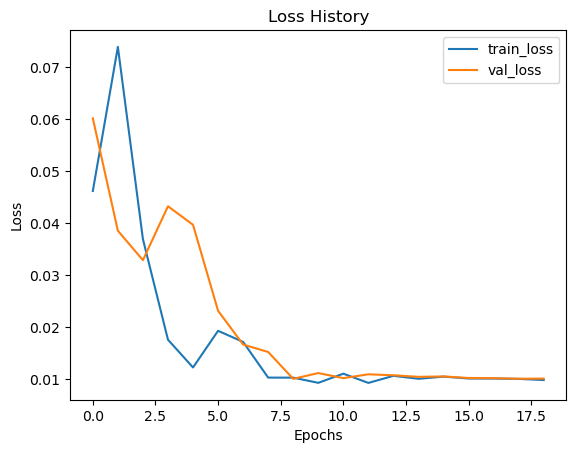

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

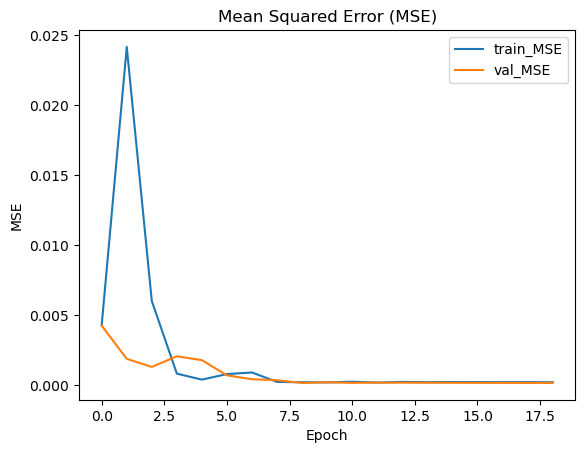

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

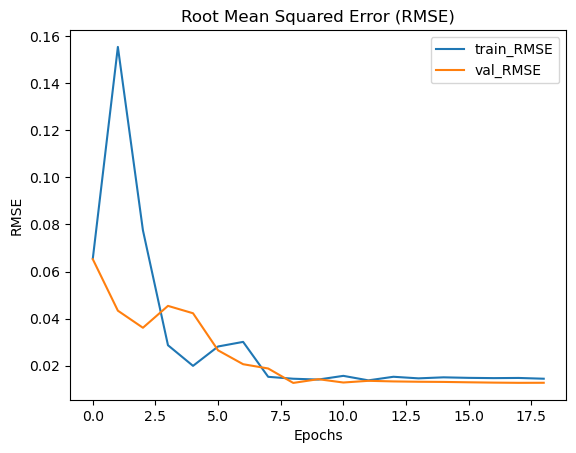

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

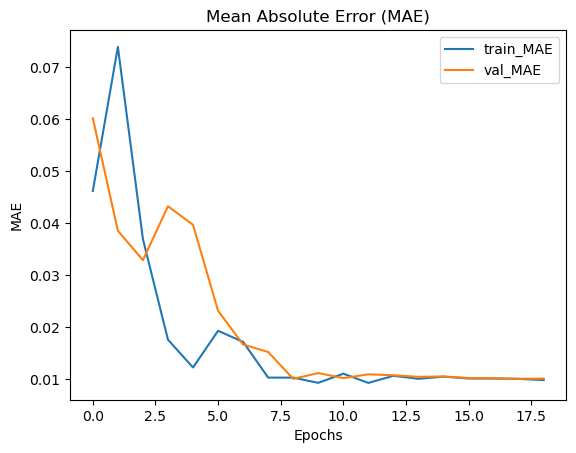

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

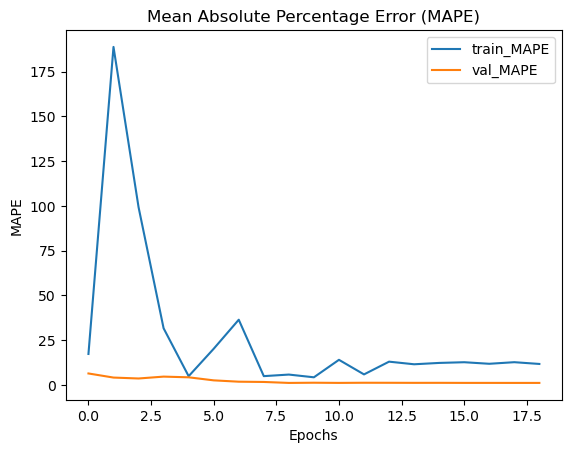

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:03:15.188005: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


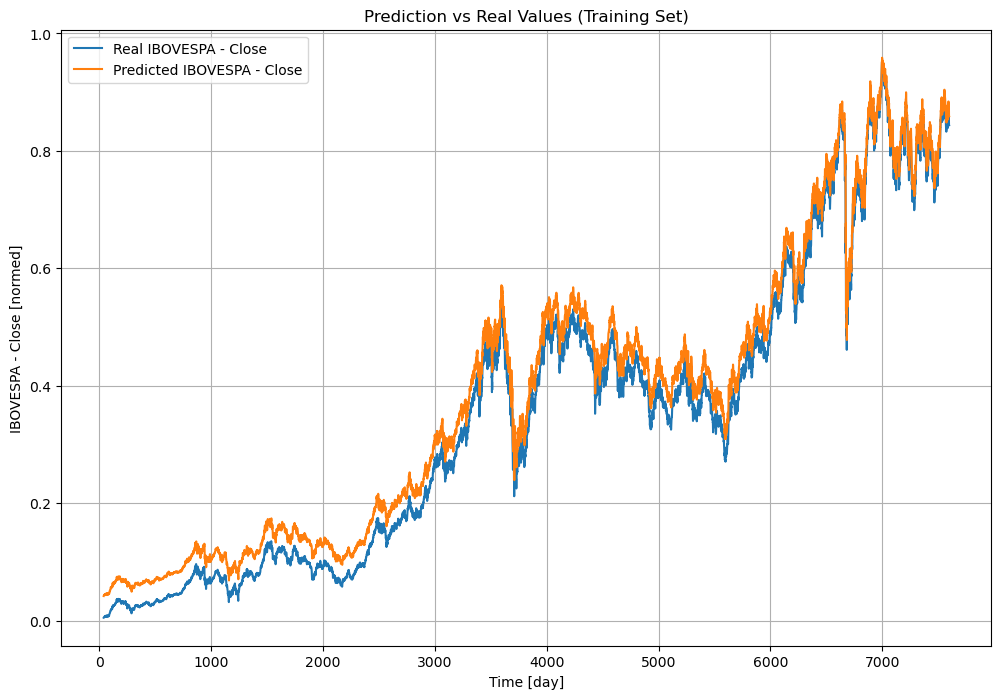

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


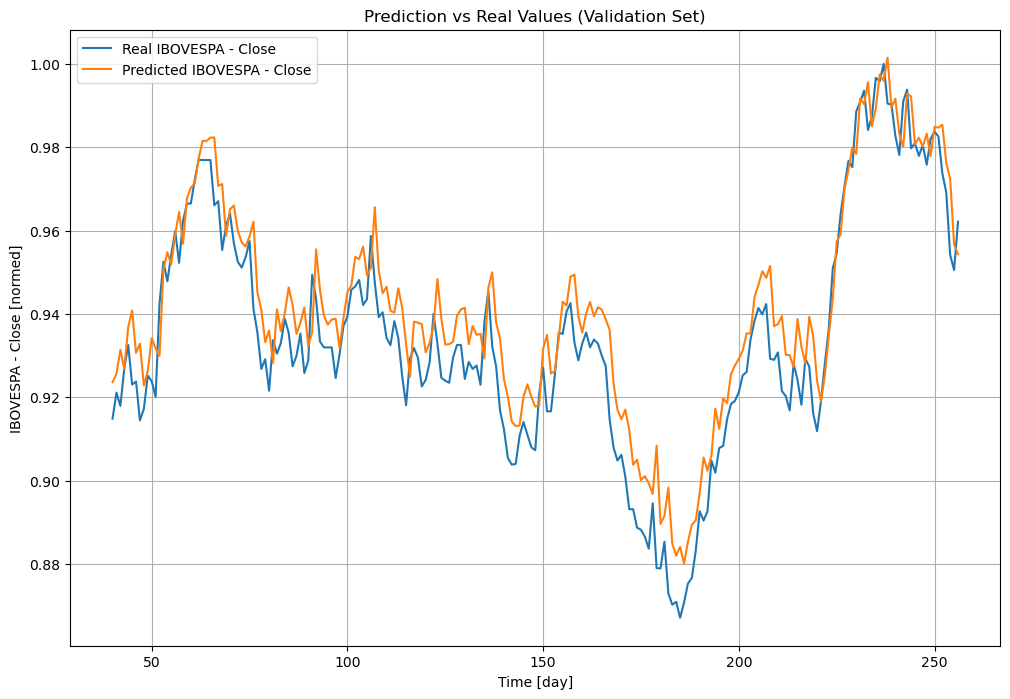

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


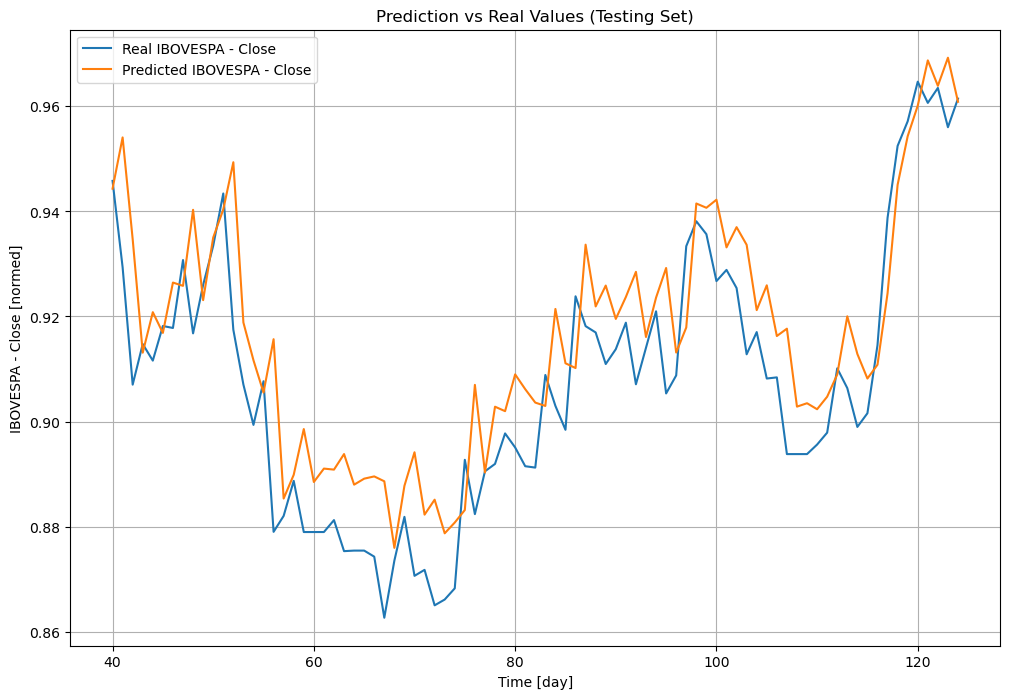

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

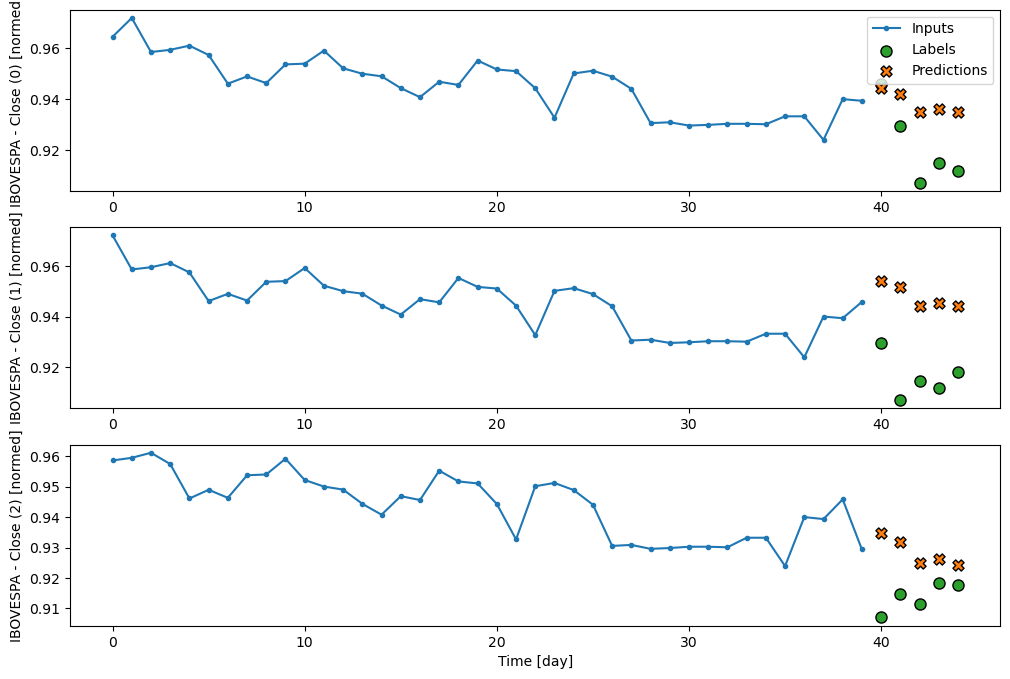

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:32s:580ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[[0.9443228 , 0.9443228 , 0.9443228 , ..., 0.9443228 ,
         0.9443228 , 0.9443228 ],
        [0.94210994, 0.94210994, 0.94210994, ..., 0.94210994,
         0.94210994, 0.94210994],
        [0.9347873 , 0.9347873 , 0.9347873 , ..., 0.9347873 ,
         0.9347873 , 0.9347873 ],
        [0.9361567 , 0.9361567 , 0.9361567 , ..., 0.9361567 ,
         0.9361567 , 0.9361567 ],
        [0.9349725 , 0.9349725 , 0.9349725 , ..., 0.9349725 ,
         0.9349724 , 0.9349724 ]],

       [[0.9540787 , 0.9540787 , 0.9540787 , ..., 0.9540787 ,
         0.9540787 , 0.9540787 ],
        [0.95185375, 0.95185375, 0.95185375, ..., 0.95185375,
         0.95185375, 0.95185375],
        [0.94423294, 0.94423294, 0.94423294, ..., 0.94423294,
         0.94423294, 0.94423294],
        [0.94551283, 0.94551283, 0.94551283, ..., 0.94551283,
         0.94551283, 0.94551283],
        [0.94418013, 0.94418013, 0.94418013, ..., 0.94418013,
         0.94418013, 0.94418013]],

       [[0.93470454, 0.93470454, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')